### PHYS 3600 Term Project
### Galaxy Apparent Magnitude & Galaxy Properties
### Le' Sean Roberts





### Summary
This is a project concerning the prediction of some properties of galaxies with respect to Apparent Mangitude (or brightness) related to spectra. Properties of interest:

         Age - how long a ago did the galaxy form its first stars?
         
         Tau - a parameter describing how fast/slow the process of star formation proceeds. Star formation history is modeled by an exponentially decaying curve, say, exp(-t/tau), where tau is the timescale that conveys how rapidly it decays with time. 
         
         Stellar Mass - the total amount of mass in stars. Conventionally expressed in units of mass of the Sun, and in log10, to avoid dealing with large numbers. 
         
         Dust - the amount of cosmic dust in a galaxy, measured as the fractional dimming of light at ultraviolet and optical wavelengths (since dust particles absorb light at those wavelengths). 
Such above properties will be indentified as targets, and feature selection to be pursued. 
Exploratory Data Analysis (EDA) and Machine Learning techniques will be applied to develop conclusions.



### Introduction
The targets for exploratory data analysis and machine learning are the four properties described above. The features are 850 measurements of brightness (apparent magnitude). Due to computational limitations feature selection and/or dimensionality reduction will be applied to such features in abundance; involves use of tools such as SelectKBest and Lasso Regression. Intially will rely heavily on exploratory data analysis upon the targets and features for:
         
         (1) Guidance concerning any possible strong interaction or association among the four galaxy properties (being targets). For the major models (relating targets to features), targets should be elementary properties rather than taking on the characteristic of "gunk" or "sludge", namely, targets lacking strong association or interaction is a appreciated towards identifying unique characteristics or properties.    
         (2) Analysis of the features with tools such as correlation measures to provide a perliminary view of possible redundancy. Conventionally, highly correlated features imply that Principal Component Analysis (PCA) isn't necessary; in our case to be done regardless to observe the relation between the number of princpipal components (PCs) and prediction performance. 
 

Project incorporates much supervised learning, such as OLS Regression, Lowess Regression, K Nearest Neighbors, KNN Regression and Lasso Regression. SelectKBest is also employed for feature selection. Principal Component Analysis (PCA), an unsupervised learning technique is also incorporated. the Random Forest ensemble method is also incorporated. Throughout the process of data analysis and implementation of machine learning, results from lasso regression provided the impression that brightness or apparent magnitude is highly insignificant in regards to predicting the targets. Other tools such as PCA, KNN Regression, Random Forest and Random Forest Regression however provided hidden information that rekindles much interest for the use of apprent magnitude (or brightness).  

In [508]:
# 1000 galaxies represented in row columns. 
# The columns are measures are measures of brightness (apparent magnitude) being the features, totalling 850, 
      # at 850 wavelengths, between 1,995 Angstrom and 100,000 Angstrom, corresponding to ultraviolet (UV) and infrared (IR).
import pandas as pd
import numpy as np  

In [509]:
spectra = pd.read_csv("spectra.csv", delimiter = " ", header = None)

In [510]:
spectra

,0,1,2,3,4,5,6,7,8,9,...,840,841,842,843,844,845,846,847,848,849
0,0.010532,0.011854,0.011477,0.011186,0.010723,0.007781,0.003281,0.007836,0.008751,0.012667,...,0.024035,0.023810,0.024046,0.023865,0.023751,0.023780,0.023700,0.023532,0.023523,0.023560
1,0.012205,0.013479,0.013350,0.013067,0.013404,0.011026,0.005107,0.011005,0.012001,0.014975,...,0.045495,0.044942,0.045321,0.044943,0.044721,0.044843,0.044598,0.043910,0.043594,0.043794
2,0.003660,0.004010,0.004001,0.003920,0.004109,0.003515,0.001691,0.003498,0.003792,0.004505,...,0.016169,0.015951,0.016057,0.015907,0.015811,0.015818,0.015722,0.015475,0.015348,0.015374
3,0.065447,0.071665,0.071253,0.069657,0.072569,0.061464,0.029246,0.060936,0.065971,0.078945,...,0.052733,0.051933,0.052260,0.051681,0.051270,0.051238,0.050767,0.049791,0.049233,0.049177
4,0.143073,0.156413,0.155725,0.152241,0.159254,0.135972,0.065265,0.134719,0.145695,0.172647,...,0.071784,0.070843,0.071313,0.070579,0.070022,0.069911,0.069362,0.068354,0.067859,0.067661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.084785,0.092999,0.092949,0.091197,0.095809,0.082226,0.039687,0.082044,0.089028,0.105681,...,0.237033,0.234978,0.237017,0.236048,0.235719,0.236943,0.236522,0.234346,0.233746,0.235702
996,0.014452,0.015888,0.016062,0.015868,0.017012,0.015016,0.007340,0.015144,0.016453,0.019114,...,0.116852,0.117667,0.119247,0.120329,0.121477,0.123043,0.124556,0.126414,0.128591,0.131057
997,0.153889,0.168172,0.167482,0.163732,0.171433,0.146658,0.070557,0.145284,0.157084,0.185707,...,0.077033,0.076005,0.076493,0.075710,0.075119,0.075009,0.074406,0.073292,0.072723,0.072523
998,0.025145,0.027639,0.027524,0.026976,0.028090,0.023713,0.011243,0.023641,0.025681,0.031034,...,0.054181,0.053688,0.054170,0.053871,0.053724,0.053934,0.053792,0.053276,0.053137,0.053471


In [511]:
spectra.shape

(1000, 850)

In [512]:
# Data for the mentioned galaxy properties for 1000 galaxies are observed. 
Galaxyproperties = pd.read_csv("GalaxyProperties.csv")

In [513]:
Galaxyproperties

,Unnamed: 0,Dust attenuation value,Age (Gyr),Log10(Mass/Mass_Sun),Tau (Gyr)
0,0,0.164869,0.203291,7.885367,0.033035
1,1,0.200852,0.470248,8.297678,0.087146
2,2,0.197863,4.033993,8.184615,1.273974
3,3,0.001000,0.721636,8.360110,0.242588
4,4,0.001000,0.699464,8.373327,0.510683
...,...,...,...,...,...
995,995,0.322905,2.018232,8.987870,2.069916
996,996,0.870794,0.075134,7.607796,0.062845
997,997,0.001000,0.849640,8.415094,0.918643
998,998,0.232163,0.586724,8.286425,0.168273


In [514]:
# Spectra ranges for particular galaxies w.r.t. wavelength.
# Interest in plotting a few spectra.

In [515]:
Galaxy_1 = spectra.iloc[0,:]
Galaxy_2 = spectra.iloc[1,:]
Galaxy_3 = spectra.iloc[2,:]
Galaxy_4 = spectra.iloc[3,:]
Galaxy_5 = spectra.iloc[4,:]

In [516]:
Galaxy_1

0      0.010532
1      0.011854
2      0.011477
3      0.011186
4      0.010723
         ...   
845    0.023780
846    0.023700
847    0.023532
848    0.023523
849    0.023560
Name: 0, Length: 850, dtype: float64

In [517]:
from scipy import stats

In [518]:
stats.skew(Galaxy_1)

1.0806319225266874

In [519]:
stats.kurtosis(Galaxy_1)

7.787878869049042

In [520]:
Galaxy_2

0      0.012205
1      0.013479
2      0.013350
3      0.013067
4      0.013404
         ...   
845    0.044843
846    0.044598
847    0.043910
848    0.043594
849    0.043794
Name: 1, Length: 850, dtype: float64

In [521]:
stats.skew(Galaxy_2)

0.7295287780382879

In [522]:
stats.kurtosis(Galaxy_2)

3.970604265444858

In [523]:
Galaxy_3

0      0.003660
1      0.004010
2      0.004001
3      0.003920
4      0.004109
         ...   
845    0.015818
846    0.015722
847    0.015475
848    0.015348
849    0.015374
Name: 2, Length: 850, dtype: float64

In [524]:
stats.skew(Galaxy_3)

0.8415027660344073

In [525]:
stats.kurtosis(Galaxy_3)

2.6087396171862673

In [526]:
# Specific wavelengths to be implemented.
Wavelengths = pd.read_csv("Wavelengths.txt", delimiter = " ", header = None)

In [527]:
Wavelengths

,0
0,1995.952
1,2005.169
2,2014.430
3,2023.732
4,2033.078
...,...
845,97947.983
846,98400.317
847,98854.740
848,99311.262


In [528]:
Wavelengths.describe()

,0
count,850.000000
mean,25025.465880
std,25508.406728
min,1995.952000
25%,5307.173250
50%,14111.589500
75%,37522.175250
max,99769.891000


In [529]:
# Giving basic spectra plots for a few of the galaxies for the specified set of wavelengths prior. 

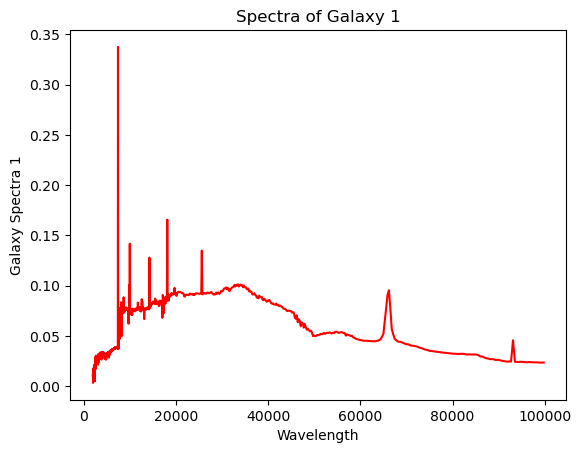

In [530]:
import numpy as np
import matplotlib.pyplot as plt
y1 = Galaxy_1
x = Wavelengths
plt.title("Spectra of Galaxy 1")
plt.xlabel("Wavelength")
plt.ylabel("Galaxy Spectra 1")
plt.plot(x, y1, color = "red")
plt.show()

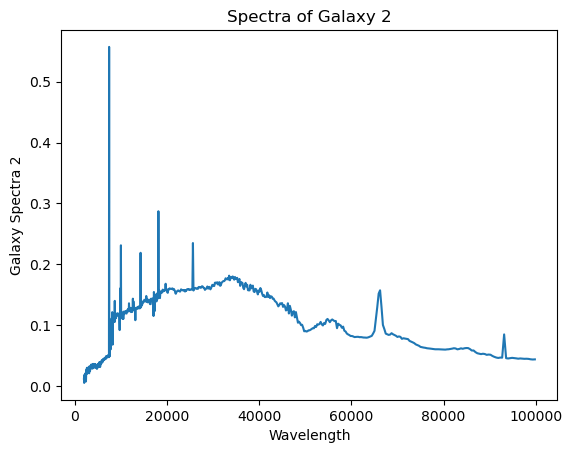

In [531]:
y2 = Galaxy_2
x = Wavelengths
plt.title("Spectra of Galaxy 2")
plt.xlabel("Wavelength")
plt.ylabel("Galaxy Spectra 2")
plt.plot(x, y2)
plt.show()

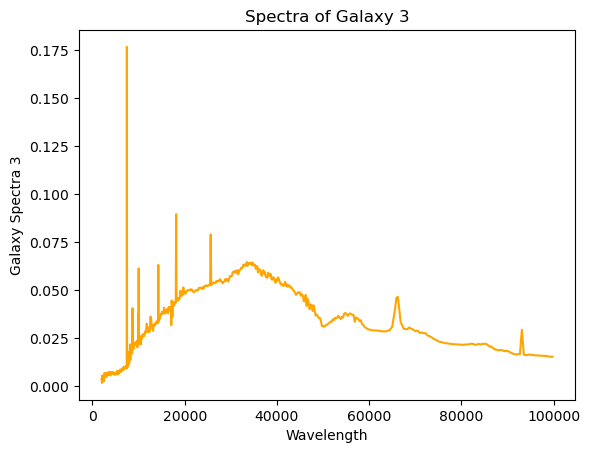

In [532]:
y3 = Galaxy_3
x = Wavelengths
plt.title("Spectra of Galaxy 3")
plt.xlabel("Wavelength")
plt.ylabel("Galaxy Spectra 3")
plt.plot(x, y3, color = "orange")
plt.show()

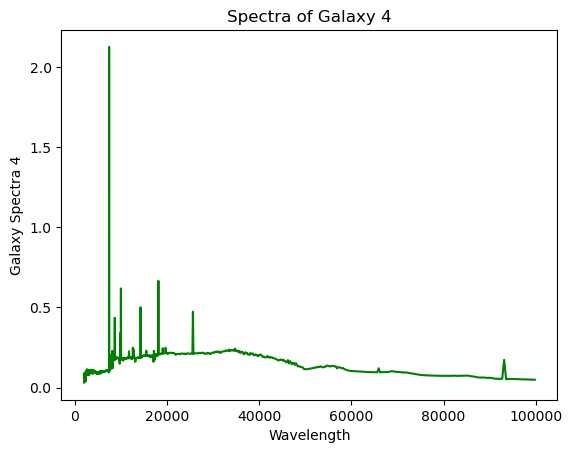

In [533]:
y4 = Galaxy_4
x = Wavelengths
plt.title("Spectra of Galaxy 4")
plt.xlabel("Wavelength")
plt.ylabel("Galaxy Spectra 4")
plt.plot(x, y4, color = "green")
plt.show()

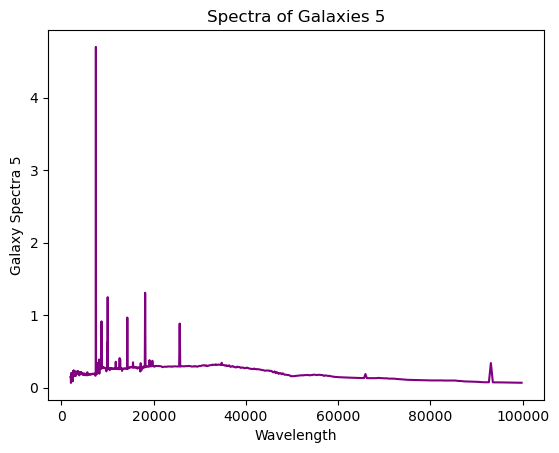

In [534]:
y5 = Galaxy_5
x = Wavelengths
plt.title("Spectra of Galaxies 5")
plt.xlabel("Wavelength")
plt.ylabel("Galaxy Spectra 5")
plt.plot(x, y5, color = "purple")
plt.show()

In [535]:
spectra.corr()

,0,1,2,3,4,5,6,7,8,9,...,840,841,842,843,844,845,846,847,848,849
0,1.000000,0.999970,0.999952,0.999884,0.999835,0.999380,0.996969,0.999397,0.999451,0.999456,...,0.148425,0.148583,0.148377,0.148465,0.148470,0.148382,0.148357,0.148435,0.148393,0.148222
1,0.999970,1.000000,0.999989,0.999958,0.999865,0.999205,0.996437,0.999280,0.999363,0.999630,...,0.150790,0.150957,0.150752,0.150847,0.150857,0.150773,0.150754,0.150844,0.150811,0.150644
2,0.999952,0.999989,1.000000,0.999985,0.999930,0.999305,0.996497,0.999399,0.999477,0.999721,...,0.151748,0.151919,0.151714,0.151813,0.151826,0.151743,0.151728,0.151821,0.151792,0.151628
3,0.999884,0.999958,0.999985,1.000000,0.999940,0.999212,0.996173,0.999348,0.999439,0.999823,...,0.153620,0.153798,0.153593,0.153698,0.153716,0.153636,0.153627,0.153730,0.153707,0.153547
4,0.999835,0.999865,0.999930,0.999940,1.000000,0.999541,0.996771,0.999659,0.999714,0.999794,...,0.153141,0.153318,0.153112,0.153217,0.153236,0.153157,0.153147,0.153247,0.153221,0.153063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0.148382,0.150773,0.151743,0.153636,0.153157,0.147051,0.134814,0.149908,0.151185,0.160121,...,0.999775,0.999891,0.999926,0.999976,0.999996,1.000000,0.999984,0.999856,0.999655,0.999564
846,0.148357,0.150754,0.151728,0.153627,0.153147,0.147022,0.134743,0.149886,0.151166,0.160127,...,0.999637,0.999790,0.999841,0.999921,0.999964,0.999984,1.000000,0.999936,0.999788,0.999716
847,0.148435,0.150844,0.151821,0.153730,0.153247,0.147083,0.134724,0.149959,0.151243,0.160253,...,0.999272,0.999498,0.999580,0.999717,0.999807,0.999856,0.999936,1.000000,0.999957,0.999921
848,0.148393,0.150811,0.151792,0.153707,0.153221,0.147026,0.134605,0.149911,0.151198,0.160248,...,0.998877,0.999163,0.999271,0.999455,0.999582,0.999655,0.999788,0.999957,1.000000,0.999994


In [536]:
# Due to an array of 850 rows and 850 columns where all labels and instances are numeric, not much can be concluded at the moment. 

### Some Elementary Data Analysis for Galaxy Properties






In [537]:
# Recalling the galaxies' properties data.
Galaxyproperties

,Unnamed: 0,Dust attenuation value,Age (Gyr),Log10(Mass/Mass_Sun),Tau (Gyr)
0,0,0.164869,0.203291,7.885367,0.033035
1,1,0.200852,0.470248,8.297678,0.087146
2,2,0.197863,4.033993,8.184615,1.273974
3,3,0.001000,0.721636,8.360110,0.242588
4,4,0.001000,0.699464,8.373327,0.510683
...,...,...,...,...,...
995,995,0.322905,2.018232,8.987870,2.069916
996,996,0.870794,0.075134,7.607796,0.062845
997,997,0.001000,0.849640,8.415094,0.918643
998,998,0.232163,0.586724,8.286425,0.168273


In [538]:
# Correlation for Galaxy Properties
Galaxyproperties.corr()

,Unnamed: 0,Dust attenuation value,Age (Gyr),Log10(Mass/Mass_Sun),Tau (Gyr)
Unnamed: 0,1.000000,-0.007196,-0.041038,-0.066476,0.004817
Dust attenuation value,-0.007196,1.000000,-0.168397,0.484020,-0.051708
Age (Gyr),-0.041038,-0.168397,1.000000,0.257964,0.401178
Log10(Mass/Mass_Sun),-0.066476,0.484020,0.257964,1.000000,0.061440
Tau (Gyr),0.004817,-0.051708,0.401178,0.061440,1.000000


In [539]:
# Based on results from the above galaxy properties correlation matrix, expected, to be little association among the independent galaxy properties. 

In [540]:
# Some descriptive statisitcs for Galaxy properties
Galaxyproperties[["Dust attenuation value", "Age (Gyr)", "Log10(Mass/Mass_Sun)", "Tau (Gyr)"]].describe(include = 'all')

,Dust attenuation value,Age (Gyr),Log10(Mass/Mass_Sun),Tau (Gyr)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.206154,0.864541,8.350318,0.658941
std,0.353411,0.820010,0.723073,1.429824
min,0.000318,0.050923,6.552173,0.010013
25%,0.001000,0.350972,7.844156,0.107822
50%,0.067976,0.597007,8.253626,0.233540
75%,0.233230,1.095535,8.710418,0.542725
max,2.833315,4.999623,11.187690,9.909633


In [541]:
# Observing the skews
Galaxyproperties.skew(axis = 0, skipna = True)

Unnamed: 0                0.000000
Dust attenuation value    3.107395
Age (Gyr)                 2.230949
Log10(Mass/Mass_Sun)      0.846563
Tau (Gyr)                 4.381364
dtype: float64

In [542]:
# Observing the various Kurtosis
Galaxyproperties.kurtosis(axis = 0, skipna = True)

Unnamed: 0                -1.200000
Dust attenuation value    12.682065
Age (Gyr)                  6.045858
Log10(Mass/Mass_Sun)       0.898775
Tau (Gyr)                 20.299001
dtype: float64

In [543]:
# Extracting each property as a single column for elementary data analysis if required in the future. 

In [544]:
Dust_attenuation_value = Galaxyproperties["Dust attenuation value"]
Dust_attenuation_value

0      0.164869
1      0.200852
2      0.197863
3      0.001000
4      0.001000
         ...   
995    0.322905
996    0.870794
997    0.001000
998    0.232163
999    0.456984
Name: Dust attenuation value, Length: 1000, dtype: float64

In [545]:
Dust_attenuation_value.shape

(1000,)

In [546]:
Star_formation_history = Galaxyproperties["Tau (Gyr)"]
Star_formation_history

0      0.033035
1      0.087146
2      1.273974
3      0.242588
4      0.510683
         ...   
995    2.069916
996    0.062845
997    0.918643
998    0.168273
999    3.523973
Name: Tau (Gyr), Length: 1000, dtype: float64

In [547]:
Star_formation_history.shape

(1000,)

In [548]:
Age = Galaxyproperties["Age (Gyr)"] 
Age

0      0.203291
1      0.470248
2      4.033993
3      0.721636
4      0.699464
         ...   
995    2.018232
996    0.075134
997    0.849640
998    0.586724
999    0.612213
Name: Age (Gyr), Length: 1000, dtype: float64

In [549]:
Age.shape

(1000,)

In [550]:
Mass_Measure = Galaxyproperties["Log10(Mass/Mass_Sun)"]
Mass_Measure

0      7.885367
1      8.297678
2      8.184615
3      8.360110
4      8.373327
         ...   
995    8.987870
996    7.607796
997    8.415094
998    8.286425
999    8.276157
Name: Log10(Mass/Mass_Sun), Length: 1000, dtype: float64

In [551]:
Mass_Measure.shape

(1000,)

<AxesSubplot:xlabel='Dust attenuation value', ylabel='Age (Gyr)'>

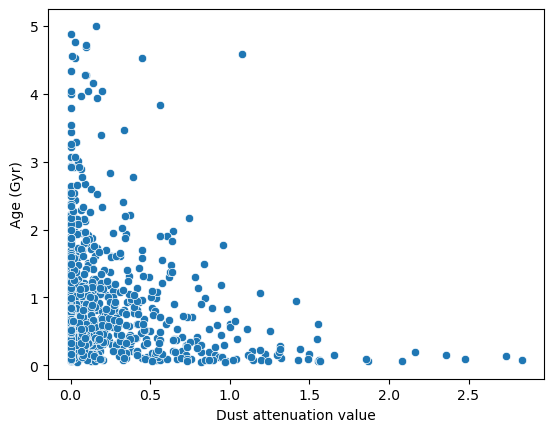

In [552]:
# Possible relationship between Age and Dust Presence.
import seaborn as sns
sns.scatterplot(data = Galaxyproperties, x = "Dust attenuation value", y = "Age (Gyr)")

[[0.42704381]]
R2 Value: 0.25437032295391215


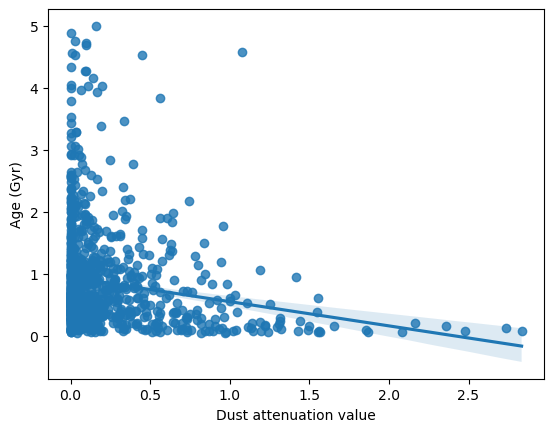

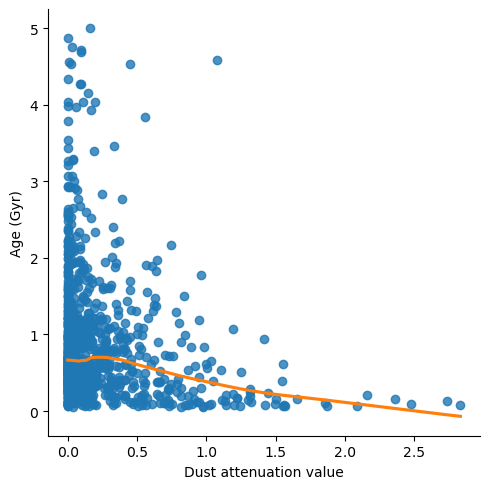

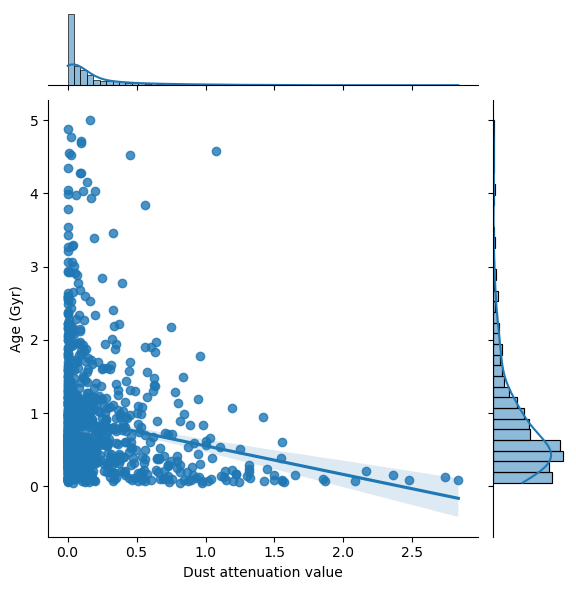

In [553]:
# For above scatter plot the spread isn't ideal. Will attempt "conventional" regression plot, lowess smoother, and KNN regressor stats.
sns.regplot(x = "Dust attenuation value", y = "Age (Gyr)", data = Galaxyproperties)

sns.lmplot(x = "Dust attenuation value", y = "Age (Gyr)", data = Galaxyproperties, lowess = True, line_kws = {"color": "C1"})

sns.jointplot(x = "Dust attenuation value", y = "Age (Gyr)", data = Galaxyproperties, kind = "reg")

from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(n_neighbors = 3)
KNR_model = KNR.fit(Dust_attenuation_value.values.reshape(-1, 1), Age.values.reshape(-1, 1))
from sklearn import metrics 
print(KNR.predict([[np.mean(Dust_attenuation_value)]]))
print('R2 Value:', metrics.r2_score(Age, KNR_model.predict(Dust_attenuation_value.values.reshape(-1, 1))))

In [554]:
# Generating Summary Statistics concerning any existing relationship between dust and age.
import statsmodels.api as smf
Dust_Age_model = smf.OLS(Age.values.reshape(-1, 1), Dust_attenuation_value.values.reshape(-1, 1)).fit()
Dust_Age_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.071
Model:                            OLS   Adj. R-squared (uncentered):              0.070
Method:                 Least Squares   F-statistic:                              75.91
Date:                Wed, 17 May 2023   Prob (F-statistic):                    1.22e-17
Time:                        15:40:40   Log-Likelihood:                         -1557.4
No. Observations:                1000   AIC:                                      3117.
Df Residuals:                     999   BIC:                                      3122.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7740      0.089      8.712      0.000       0.600       0.948
==============================================================================
Omnibus:                      312.670   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1127.665
Skew:                           1.479   Prob(JB):                    1.35e-245
Kurtosis:                       7.280   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [555]:
# R-squared being the Coefficient od Determination, a measure of 0.071 conveys a very poor model. 
# R-squared valued based on KNN regressor yields approximately 0.2544.

<AxesSubplot:xlabel='Dust attenuation value', ylabel='Log10(Mass/Mass_Sun)'>

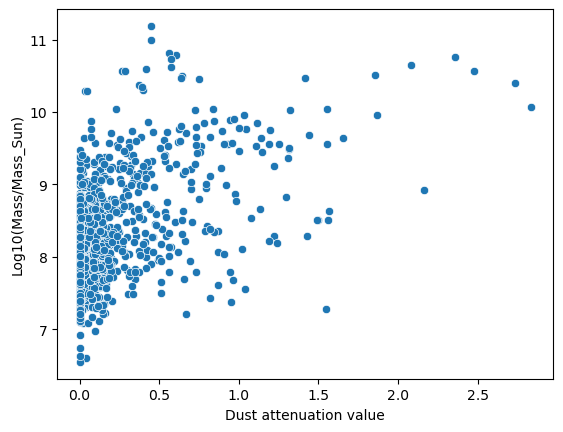

In [556]:
# Possible relationship between Mass presence and Dust presence. 
sns.scatterplot(data = Galaxyproperties, x = "Dust attenuation value", y = "Log10(Mass/Mass_Sun)")

[[8.54349854]]
2 Value: 0.47616224364313864


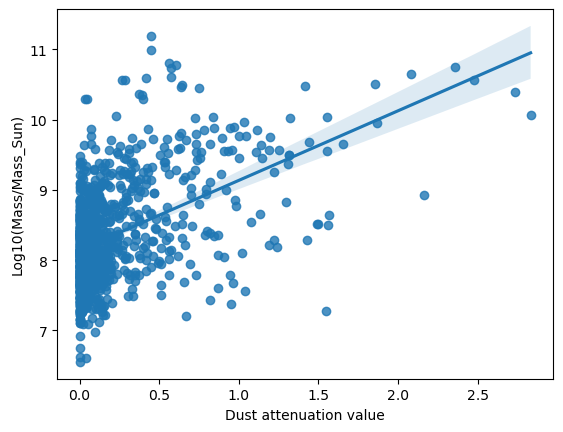

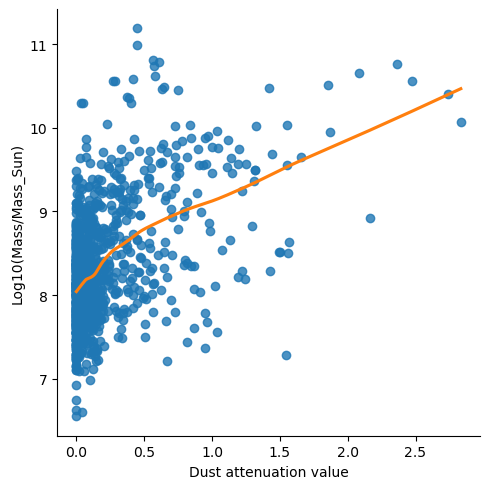

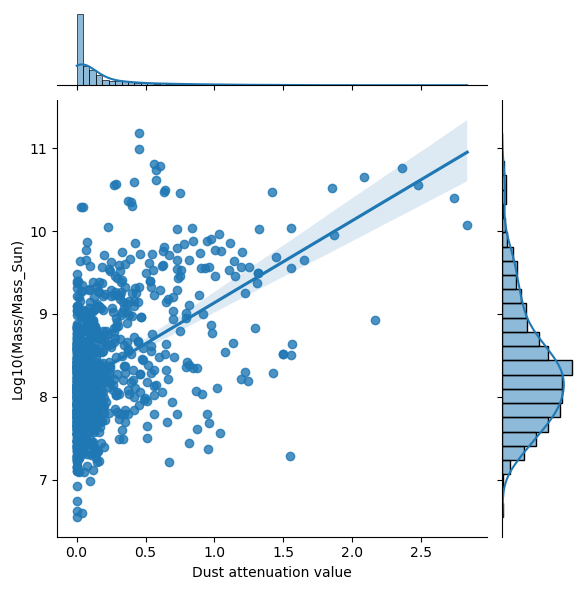

In [557]:
# For above scatter plot the spread isn't ideal. Will attempt "conventional" regression plot, lowess smoother, and KNN regressor stats.
sns.regplot(x = "Dust attenuation value", y = "Log10(Mass/Mass_Sun)", data = Galaxyproperties)

sns.lmplot(x = "Dust attenuation value", y = "Log10(Mass/Mass_Sun)", data = Galaxyproperties, lowess = True, line_kws = {"color": "C1"})

sns.jointplot(x = "Dust attenuation value", y = "Log10(Mass/Mass_Sun)", data = Galaxyproperties, kind = "reg")

from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(n_neighbors = 3)
KNR_model = KNR.fit(Dust_attenuation_value.values.reshape(-1, 1), Mass_Measure.values.reshape(-1, 1))
KNR_model
print(KNR.predict([[np.mean(Dust_attenuation_value)]]))
print('2 Value:', metrics.r2_score(Mass_Measure, KNR_model.predict(Dust_attenuation_value.values.reshape(-1, 1))))

In [558]:
# Generating Summary Statistics concerning any existing relationship between dust and mass.
import statsmodels.api as smf
Dust_Mass_model = smf.OLS(Mass_Measure.values.reshape(-1, 1), Dust_attenuation_value.values.reshape(-1, 1)).fit()
Dust_Mass_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.290
Model:                            OLS   Adj. R-squared (uncentered):              0.289
Method:                 Least Squares   F-statistic:                              407.4
Date:                Wed, 17 May 2023   Prob (F-statistic):                    2.95e-76
Time:                        15:40:43   Log-Likelihood:                         -3373.9
No. Observations:                1000   AIC:                                      6750.
Df Residuals:                     999   BIC:                                      6755.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.0299      0.546     20.185      0.000       9.958      12.102
==============================================================================
Omnibus:                      699.130   Durbin-Watson:                   0.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8733.320
Skew:                          -3.154   Prob(JB):                         0.00
Kurtosis:                      16.031   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [559]:
# R-squared being the Coefficient of Determination, a measure of 0.290 conveys a very poor model. 
# R-squared value based on KNN regressor yoileds approximately 0.4762

<AxesSubplot:xlabel='Dust attenuation value', ylabel='Tau (Gyr)'>

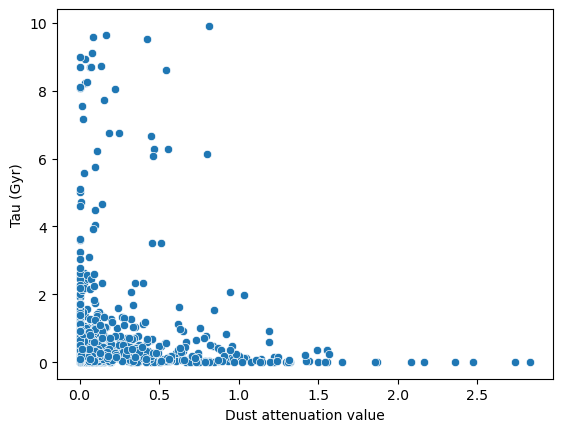

In [560]:
# Possible relationship between Dust presence and Star Formation Process Rate 
sns.scatterplot(data = Galaxyproperties, x = "Dust attenuation value", y = "Tau (Gyr)")

[[0.11916159]]
R2 Value: 0.2477154391362273


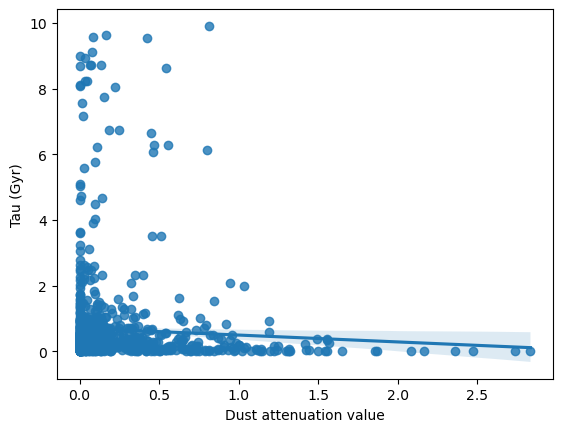

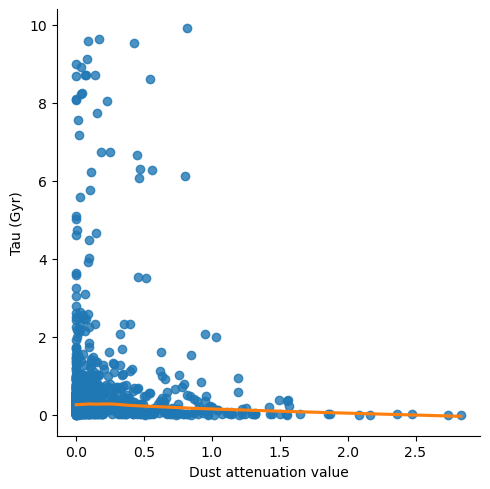

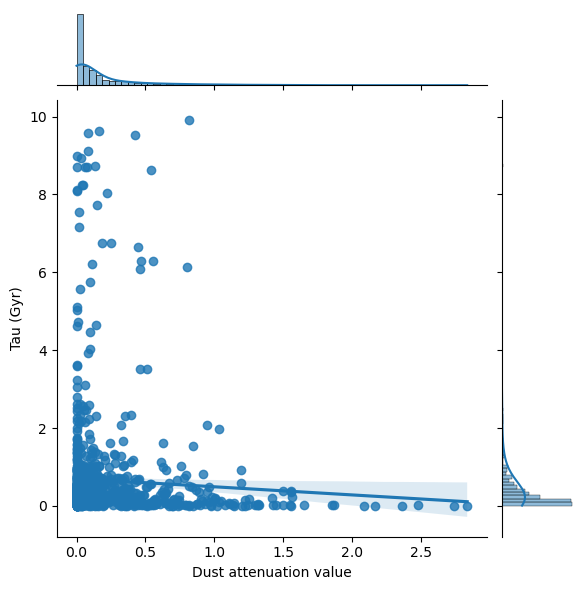

In [561]:
# For above scatter plot the spread isn't ideal. Will attempt "conventional" regression plot, lowess smoother, and KNN regressor stats.
sns.regplot(x = "Dust attenuation value", y = "Tau (Gyr)", data = Galaxyproperties)

sns.lmplot(x = "Dust attenuation value", y = "Tau (Gyr)", data = Galaxyproperties, lowess = True, line_kws = {"color": "C1"})

sns.jointplot(x = "Dust attenuation value", y = "Tau (Gyr)", data = Galaxyproperties, kind = "reg")

from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(n_neighbors = 3)
KNR_model = KNR.fit(Dust_attenuation_value.values.reshape(-1, 1), Star_formation_history.values.reshape(-1, 1))
KNR_model
print(KNR.predict([[np.mean(Dust_attenuation_value)]]))
print('R2 Value:', metrics.r2_score(Star_formation_history, KNR_model.predict(Dust_attenuation_value.values.reshape(-1, 1))))

In [562]:
# Generating Summary Statistics concerning any existing relationship between Dust presence and Star Formation Process rate.
import statsmodels.api as smf
Dust_Starform_model = smf.OLS(Star_formation_history.values.reshape(-1, 1), Dust_attenuation_value.values.reshape(-1, 1)).fit()
Dust_Starform_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.029
Model:                            OLS   Adj. R-squared (uncentered):              0.028
Method:                 Least Squares   F-statistic:                              29.91
Date:                Wed, 17 May 2023   Prob (F-statistic):                    5.72e-08
Time:                        15:40:46   Log-Likelihood:                         -1857.6
No. Observations:                1000   AIC:                                      3717.
Df Residuals:                     999   BIC:                                      3722.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6561      0.120      5.469      0.000       0.421       0.891
==============================================================================
Omnibus:                      864.648   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17093.764
Skew:                           4.093   Prob(JB):                         0.00
Kurtosis:                      21.527   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [563]:
# R-squared being the Coefficient od Determination, a measure of 0.029 conveys a very poor model. 
# R-squared value based on KNN regressor yileds approximately 0.24772.

<AxesSubplot:xlabel='Age (Gyr)', ylabel='Log10(Mass/Mass_Sun)'>

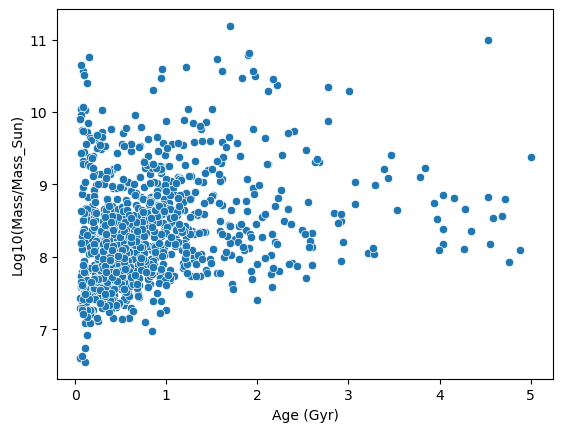

In [564]:
# Possible relationship between Age and Mass presence
sns.scatterplot(data = Galaxyproperties, x = "Age (Gyr)", y = "Log10(Mass/Mass_Sun)")

[[8.2650796]]
r2 Value: 0.38045472699227967


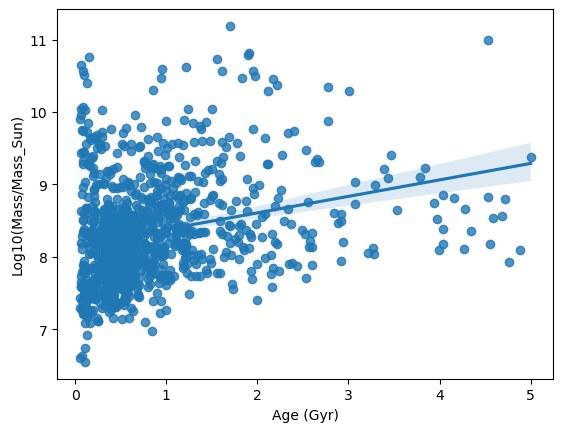

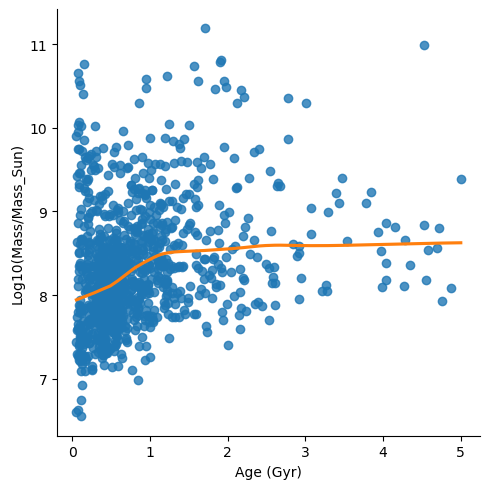

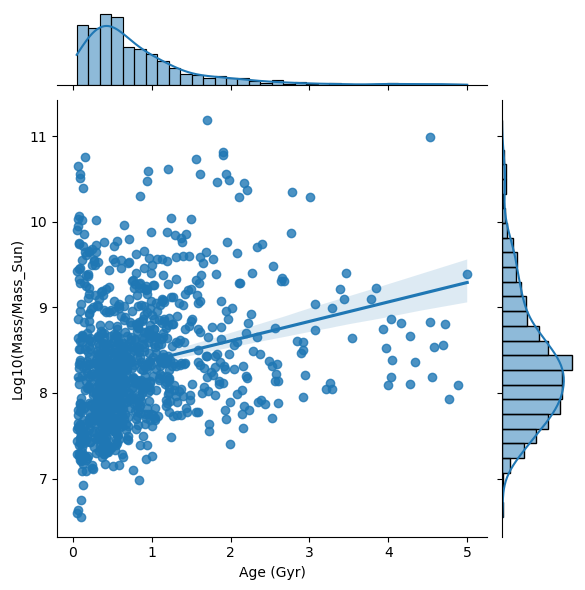

In [565]:
# For above scatter plot the spread isn't ideal. Will attempt "conventional" regression plot, lowess smoother, and KNN regressor stats.
sns.regplot(x = "Age (Gyr)", y = "Log10(Mass/Mass_Sun)", data = Galaxyproperties)

sns.lmplot(x = "Age (Gyr)", y = "Log10(Mass/Mass_Sun)", data = Galaxyproperties, lowess = True, line_kws = {"color": "C1"})

sns.jointplot(x = "Age (Gyr)", y = "Log10(Mass/Mass_Sun)", data = Galaxyproperties, kind = "reg")

from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(n_neighbors = 3)
KNR_model = KNR.fit(Age.values.reshape(-1, 1), Mass_Measure.values.reshape(-1, 1))
KNR_model
print(KNR.predict([[np.mean(Age)]]))
print('r2 Value:', metrics.r2_score(Mass_Measure, KNR_model.predict(Age.values.reshape(-1, 1))))

In [566]:
# Generating Summary Statistics concerning any existing relationship between Age and Mass presence.
import statsmodels.api as smf
Age_Mass_model = smf.OLS(Mass_Measure.values.reshape(-1, 1), Age.values.reshape(-1, 1)).fit()
Age_Mass_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.545
Model:                            OLS   Adj. R-squared (uncentered):              0.545
Method:                 Least Squares   F-statistic:                              1197.
Date:                Wed, 17 May 2023   Prob (F-statistic):                   4.53e-173
Time:                        15:40:48   Log-Likelihood:                         -3151.1
No. Observations:                1000   AIC:                                      6304.
Df Residuals:                     999   BIC:                                      6309.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.1946      0.150     34.600      0.000       4.900       5.489
==============================================================================
Omnibus:                      486.164   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.393
Skew:                          -2.253   Prob(JB):                         0.00
Kurtosis:                       9.448   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [567]:
# R-squared being the Coefficient od Determination, a measure of 0.545 conveys an indecisive model. 
# R-squared value based on KNN regressor yileds approximately 0.380455.

<AxesSubplot:xlabel='Tau (Gyr)', ylabel='Age (Gyr)'>

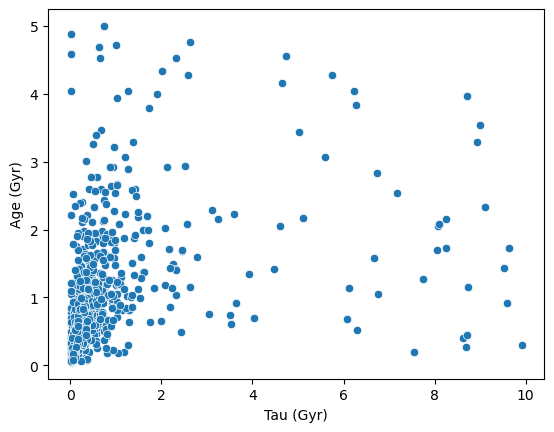

In [568]:
#Possible relationship between Star Process Formation Rate and Age 
sns.scatterplot(data = Galaxyproperties, x = "Tau (Gyr)", y = "Age (Gyr)")

[[1.97933132]]
R2 Value: 0.5611167486161406


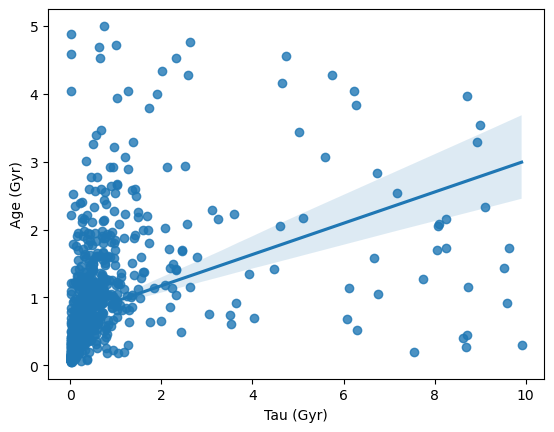

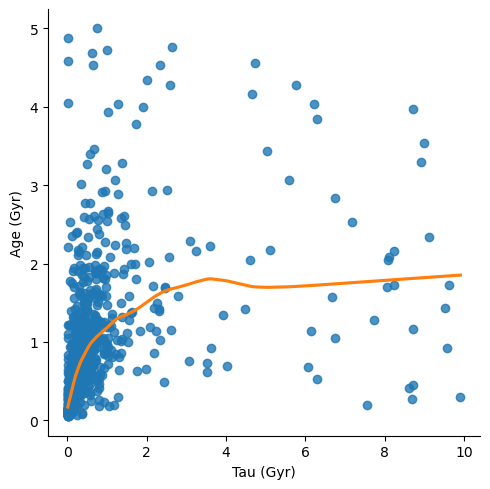

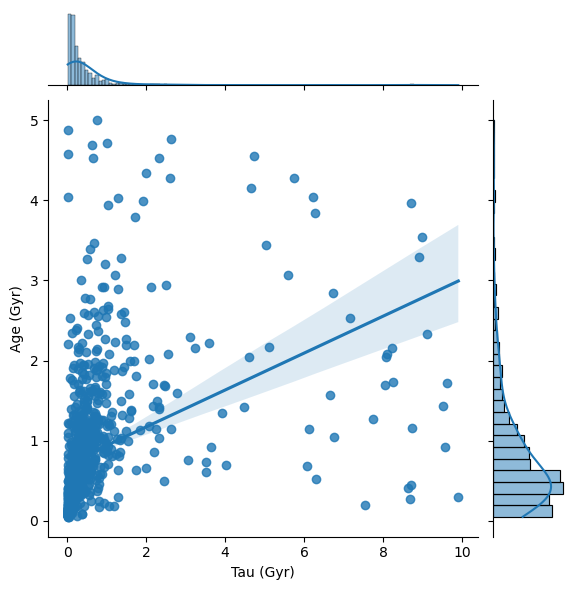

In [569]:
# For above scatter plot the spread isn't ideal. Will attempt "conventional" regression plot, lowess smoother, and KNN regressor stats.
sns.regplot(x = "Tau (Gyr)", y = "Age (Gyr)", data = Galaxyproperties)

sns.lmplot(x = "Tau (Gyr)", y = "Age (Gyr)", data = Galaxyproperties, lowess = True, line_kws = {"color": "C1"})

sns.jointplot(x = "Tau (Gyr)", y = "Age (Gyr)", data = Galaxyproperties, kind = "reg")

from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(n_neighbors = 3)
KNR_model = KNR.fit(Star_formation_history.values.reshape(-1, 1), Age.values.reshape(-1, 1))
KNR_model
print(KNR.predict([[np.mean(Star_formation_history)]]))
print('R2 Value:', metrics.r2_score(Age, KNR_model.predict(Star_formation_history.values.reshape(-1, 1))))

In [570]:
# Generating Summary Statistics concerning any existing relationship between Age and Star Formation Process Rate presence.
import statsmodels.api as smf
Tau_Age_model = smf.OLS(Age.values.reshape(-1, 1), Star_formation_history.values.reshape(-1, 1)).fit()
Tau_Age_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.307
Model:                            OLS   Adj. R-squared (uncentered):              0.307
Method:                 Least Squares   F-statistic:                              443.6
Date:                Wed, 17 May 2023   Prob (F-statistic):                    8.90e-82
Time:                        15:40:51   Log-Likelihood:                         -1410.3
No. Observations:                1000   AIC:                                      2823.
Df Residuals:                     999   BIC:                                      2827.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4198      0.020     21.061      0.000       0.381       0.459
==============================================================================
Omnibus:                      213.500   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3044.724
Skew:                           0.546   Prob(JB):                         0.00
Kurtosis:                      11.478   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [571]:
# R-squared being the Coefficient od Determination, a measure of 0.307 conveys a poor model. 
# R-squared value based on KNN regressor yields 0.56112.

<AxesSubplot:xlabel='Tau (Gyr)', ylabel='Log10(Mass/Mass_Sun)'>

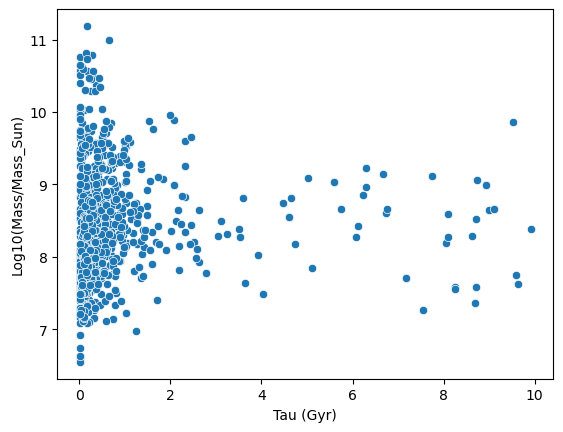

In [572]:
# Possible realtionship between Star formation Process Rate and Mass presence
sns.scatterplot(data = Galaxyproperties, x = "Tau (Gyr)", y = "Log10(Mass/Mass_Sun)")

[[9.41611793]]
r2 Value: 0.36765819324356774


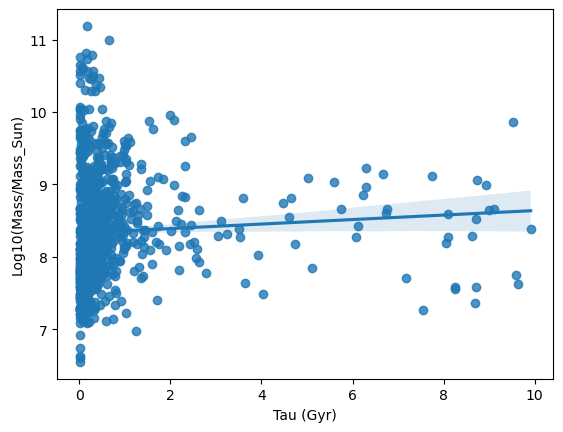

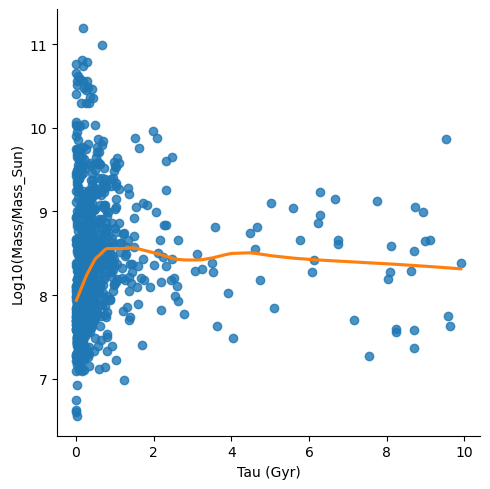

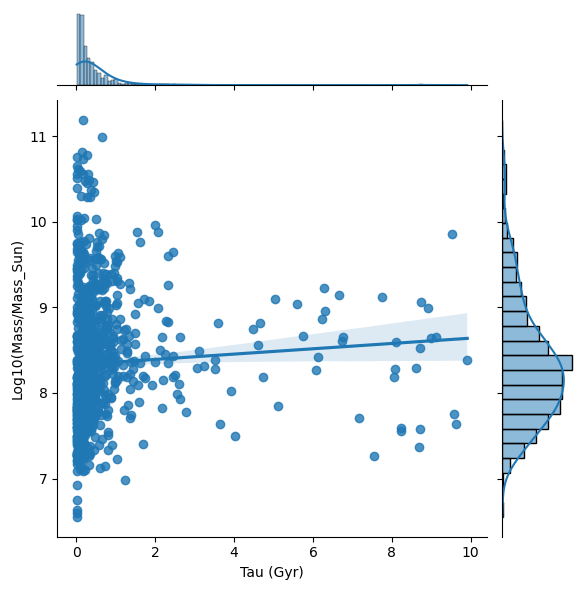

In [573]:
# For above scatter plot the spread isn't ideal. Will attempt "conventional" regression plot, lowess smoother, and KNN regressor stats.
sns.regplot(x = "Tau (Gyr)", y = "Log10(Mass/Mass_Sun)", data = Galaxyproperties)

sns.lmplot(x = "Tau (Gyr)", y = "Log10(Mass/Mass_Sun)", data = Galaxyproperties, lowess = True, line_kws = {"color": "C1"})

sns.jointplot(x = "Tau (Gyr)", y = "Log10(Mass/Mass_Sun)", data = Galaxyproperties, kind = "reg")

from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(n_neighbors = 3)
KNR_model = KNR.fit(Star_formation_history.values.reshape(-1, 1), Mass_Measure.values.reshape(-1, 1))
KNR_model
print(KNR.predict([[np.mean(Star_formation_history)]]))
print('r2 Value:', metrics.r2_score(Mass_Measure, KNR_model.predict(Star_formation_history.values.reshape(-1, 1))))

In [574]:
# Generating Summary Statistics concerning any existing relationship between Star Formation Process Rate and Mass presence.
import statsmodels.api as smf
Tau_Age_model = smf.OLS(Mass_Measure.values.reshape(-1, 1), Star_formation_history.values.reshape(-1, 1)).fit()
Tau_Age_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.178
Model:                            OLS   Adj. R-squared (uncentered):              0.177
Method:                 Least Squares   F-statistic:                              216.4
Date:                Wed, 17 May 2023   Prob (F-statistic):                    1.73e-44
Time:                        15:40:53   Log-Likelihood:                         -3446.9
No. Observations:                1000   AIC:                                      6896.
Df Residuals:                     999   BIC:                                      6901.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.2474      0.153     14.711      0.000       1.948       2.547
==============================================================================
Omnibus:                      880.449   Durbin-Watson:                   0.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18439.787
Skew:                          -4.183   Prob(JB):                         0.00
Kurtosis:                      22.302   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [575]:
# R-squared being the Coefficient od Determination, a measure of 0.178 conveys a poor model. 
# R-squared value based on KNN regressor yields approximately 0.3677.

### Conclusion from Bivariate Data Analysis


For all galaxy properties identified, observed among them is high independence based on the Coeficient of Determination; which appears to be in agreement with the developed correlation matrix earlier. Credible multivariate supervised learning models can possibly be implemented with all such properties (or variables), assuming that they are all highly influential in the study of galaxies.  







### Some Wavelengths Data Review and Analysis  

In [576]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.model_selection import KFold
from sklearn import linear_model #New!
import seaborn as sns
from sklearn import preprocessing

In [577]:
# Kept on receiving pesky error of "x is not 1-dimensional", so resorted to the following:
wv = Wavelengths.iloc[:,0]
wv
# Still must personally figure out the difference between (850,) and (850, 1).

0       1995.952
1       2005.169
2       2014.430
3       2023.732
4       2033.078
         ...    
845    97947.983
846    98400.317
847    98854.740
848    99311.262
849    99769.891
Name: 0, Length: 850, dtype: float64

In [578]:
wv.shape

(850,)

In [579]:
wv.describe()

count      850.000000
mean     25025.465880
std      25508.406728
min       1995.952000
25%       5307.173250
50%      14111.589500
75%      37522.175250
max      99769.891000
Name: 0, dtype: float64

In [580]:
from scipy.stats import skew, kurtosis
stats.skew(wv)

1.2460939829916475

In [581]:
stats.kurtosis(wv)

0.5094414512112189

Text(0.5, 1.0, 'Mean Spectrum')

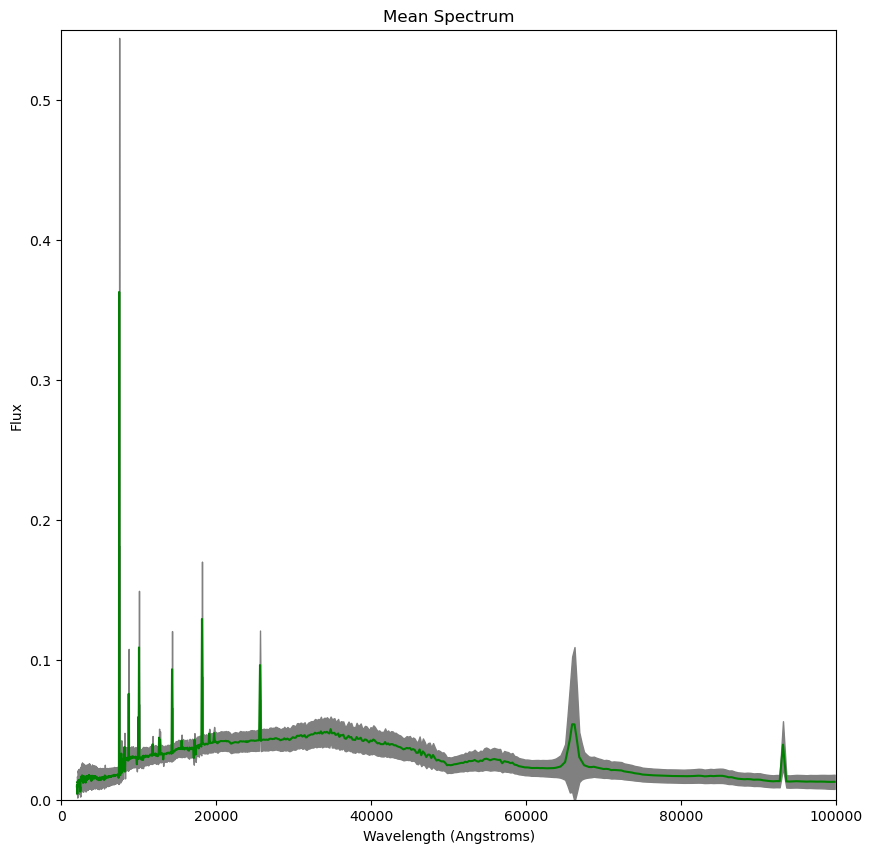

In [582]:
# Developing mean spectra display
Spec = preprocessing.normalize(spectra)
mean = Spec.mean(0)
std = Spec.std(0)
plt.figure(figsize = (10, 10))
plt.plot(wv, mean, color = 'green')
plt.fill_between(wv, mean - std, mean + std, color = 'grey')
plt.xlim(0, 100000, 500)
plt.ylim(0, 0.55)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.title('Mean Spectrum')

### Pursuing Features Selection to relate to Galaxy Properties

In [583]:
# Reviewing the correlation matrix for the spectra of 1000 Galaxies
spectra.corr()

,0,1,2,3,4,5,6,7,8,9,...,840,841,842,843,844,845,846,847,848,849
0,1.000000,0.999970,0.999952,0.999884,0.999835,0.999380,0.996969,0.999397,0.999451,0.999456,...,0.148425,0.148583,0.148377,0.148465,0.148470,0.148382,0.148357,0.148435,0.148393,0.148222
1,0.999970,1.000000,0.999989,0.999958,0.999865,0.999205,0.996437,0.999280,0.999363,0.999630,...,0.150790,0.150957,0.150752,0.150847,0.150857,0.150773,0.150754,0.150844,0.150811,0.150644
2,0.999952,0.999989,1.000000,0.999985,0.999930,0.999305,0.996497,0.999399,0.999477,0.999721,...,0.151748,0.151919,0.151714,0.151813,0.151826,0.151743,0.151728,0.151821,0.151792,0.151628
3,0.999884,0.999958,0.999985,1.000000,0.999940,0.999212,0.996173,0.999348,0.999439,0.999823,...,0.153620,0.153798,0.153593,0.153698,0.153716,0.153636,0.153627,0.153730,0.153707,0.153547
4,0.999835,0.999865,0.999930,0.999940,1.000000,0.999541,0.996771,0.999659,0.999714,0.999794,...,0.153141,0.153318,0.153112,0.153217,0.153236,0.153157,0.153147,0.153247,0.153221,0.153063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0.148382,0.150773,0.151743,0.153636,0.153157,0.147051,0.134814,0.149908,0.151185,0.160121,...,0.999775,0.999891,0.999926,0.999976,0.999996,1.000000,0.999984,0.999856,0.999655,0.999564
846,0.148357,0.150754,0.151728,0.153627,0.153147,0.147022,0.134743,0.149886,0.151166,0.160127,...,0.999637,0.999790,0.999841,0.999921,0.999964,0.999984,1.000000,0.999936,0.999788,0.999716
847,0.148435,0.150844,0.151821,0.153730,0.153247,0.147083,0.134724,0.149959,0.151243,0.160253,...,0.999272,0.999498,0.999580,0.999717,0.999807,0.999856,0.999936,1.000000,0.999957,0.999921
848,0.148393,0.150811,0.151792,0.153707,0.153221,0.147026,0.134605,0.149911,0.151198,0.160248,...,0.998877,0.999163,0.999271,0.999455,0.999582,0.999655,0.999788,0.999957,1.000000,0.999994


In [584]:
# Now pursuing sorting of correlation matrix 
spec_corr = spectra.corr().abs()
sort_corr_mat = spec_corr.unstack().sort_values()
print(sort_corr_mat)

760  6      0.119287
6    760    0.119287
761  6      0.120758
6    761    0.120758
758  6      0.120870
              ...   
561  561    1.000000
560  560    1.000000
559  559    1.000000
557  557    1.000000
849  849    1.000000
Length: 722500, dtype: float64


In [585]:
# Struggling to make sense of what is synthesized about. Moving on.

In [586]:
# Pursuing age features

In [587]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression 
# Test features to keep
k = 10 
# Performing feature selection
Spectra_new_age = SelectKBest(f_regression, k = k).fit_transform(spectra, Age)
# Get feature identities of selected features
selected_features_age = spectra.columns[SelectKBest(f_regression, k = k).fit(spectra, Age).get_support()]
# Print selected features
print(selected_features_age)

Int64Index([189, 190, 191, 198, 202, 203, 209, 220, 224, 228], dtype='int64')


In [588]:
feature_1_for_age = spectra.values[:,189]
feature_2_for_age = spectra.values[:,190]
feature_3_for_age = spectra.values[:,191]
feature_4_for_age = spectra.values[:,198]
feature_5_for_age = spectra.values[:,202]
feature_6_for_age = spectra.values[:,203]
feature_7_for_age = spectra.values[:,209]
feature_8_for_age = spectra.values[:,220]
feature_9_for_age = spectra.values[:,224]
feature_10_for_age = spectra.values[:,228]
Age_features = np.array([feature_1_for_age, feature_2_for_age, feature_3_for_age, feature_4_for_age, feature_5_for_age, 
                         feature_6_for_age, feature_7_for_age, feature_8_for_age, feature_9_for_age, feature_10_for_age])
Age_features = pd.DataFrame(Age_features)
Age_features

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.027054,0.029372,0.006103,0.087560,0.177387,0.023470,0.226725,0.014304,0.785497,0.137418,...,0.084767,0.052926,0.065637,0.017671,0.406859,0.163597,0.050485,0.188907,0.048144,0.103032
1,0.027338,0.029224,0.006122,0.087837,0.178817,0.023650,0.225415,0.014358,0.795576,0.139298,...,0.085933,0.052536,0.066353,0.017810,0.410351,0.164770,0.051264,0.190408,0.048340,0.104299
2,0.026362,0.028171,0.005969,0.085430,0.174518,0.023085,0.219252,0.013901,0.780203,0.136746,...,0.083828,0.050627,0.064780,0.017388,0.400923,0.160983,0.050569,0.185898,0.047005,0.102228
3,0.029536,0.032202,0.006421,0.091313,0.182145,0.024223,0.248751,0.015174,0.831800,0.142806,...,0.086467,0.057370,0.067983,0.018127,0.419747,0.171329,0.052527,0.193760,0.050998,0.107151
4,0.030720,0.032962,0.006414,0.091521,0.182385,0.024275,0.249874,0.015450,0.845129,0.144133,...,0.086720,0.058163,0.068577,0.018129,0.420832,0.172014,0.052951,0.193786,0.051571,0.108109
5,0.028356,0.030646,0.006077,0.085733,0.171140,0.022793,0.247342,0.014373,0.796707,0.135954,...,0.081260,0.054122,0.064298,0.017022,0.395441,0.162070,0.050194,0.181950,0.048273,0.101830
6,0.029803,0.032482,0.006365,0.089579,0.177956,0.023773,0.258273,0.015033,0.847115,0.143226,...,0.084393,0.057071,0.067178,0.017697,0.412771,0.170420,0.053340,0.189164,0.050834,0.107132
7,0.028489,0.031256,0.006142,0.085162,0.169031,0.022689,0.257482,0.014273,0.840081,0.140271,...,0.079951,0.054328,0.064395,0.016813,0.395083,0.165098,0.053240,0.179709,0.048951,0.104418
8,0.033052,0.036372,0.007576,0.104510,0.212539,0.028517,0.299186,0.017090,1.080410,0.182279,...,0.100048,0.063072,0.081023,0.021182,0.499400,0.207637,0.070937,0.226455,0.059894,0.134392
9,0.032871,0.036188,0.006664,0.092608,0.180266,0.024312,0.280351,0.015938,0.919611,0.150288,...,0.084611,0.062089,0.069329,0.017897,0.422660,0.178997,0.056603,0.191275,0.054179,0.112227


In [589]:
Age_features = Age_features.T # Transposing to to make features appear as column vectors.
Age_features.shape

(1000, 10)

In [590]:
Age_features.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.999957,0.999954,0.999654,0.999398,0.999377,0.998718,0.997324,0.997969,0.994948
1,0.999957,1.000000,0.999989,0.999636,0.999487,0.999419,0.998852,0.997564,0.998170,0.995252
2,0.999954,0.999989,1.000000,0.999568,0.999407,0.999345,0.998739,0.997428,0.998195,0.995036
3,0.999654,0.999636,0.999568,1.000000,0.999901,0.999934,0.999640,0.998752,0.998800,0.997111
4,0.999398,0.999487,0.999407,0.999901,1.000000,0.999969,0.999839,0.999172,0.999160,0.997777
5,0.999377,0.999419,0.999345,0.999934,0.999969,1.000000,0.999848,0.999193,0.999184,0.997803
6,0.998718,0.998852,0.998739,0.999640,0.999839,0.999848,1.000000,0.999724,0.999366,0.998744
7,0.997324,0.997564,0.997428,0.998752,0.999172,0.999193,0.999724,1.000000,0.999370,0.999566
8,0.997969,0.998170,0.998195,0.998800,0.999160,0.999184,0.999366,0.999370,1.000000,0.998288
9,0.994948,0.995252,0.995036,0.997111,0.997777,0.997803,0.998744,0.999566,0.998288,1.000000


In [591]:
# There appears to be much much correlation among the features, which may pose an issue later on concerning the relevance of PCA.

In [592]:
# Pursuing Dust Attenuation features

In [593]:
# Test features to keep
k = 10 
# Get feature identities of selected features
selected_features_dust = spectra.columns[SelectKBest(f_regression, k = k).fit(spectra, Dust_attenuation_value).get_support()]
# Print selected features
print(selected_features_dust)

Int64Index([756, 762, 763, 834, 844, 845, 846, 847, 848, 849], dtype='int64')


In [594]:
feature_1_for_dust = spectra.values[:,756]
feature_2_for_dust = spectra.values[:,762]
feature_3_for_dust = spectra.values[:,763]
feature_4_for_dust = spectra.values[:,834]
feature_5_for_dust = spectra.values[:,844]
feature_6_for_dust = spectra.values[:,845]
feature_7_for_dust = spectra.values[:,846]
feature_8_for_dust = spectra.values[:,847]
feature_9_for_dust = spectra.values[:,848]
feature_10_for_dust = spectra.values[:,849]
Dust_features = np.array([feature_1_for_dust, feature_2_for_dust, feature_3_for_dust, feature_4_for_dust, feature_5_for_dust, 
                         feature_6_for_dust, feature_7_for_dust, feature_8_for_dust, feature_9_for_dust, feature_10_for_dust])
Dust_features = pd.DataFrame(Dust_features).T

In [595]:
Dust_features.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.999036,0.999879,0.930819,0.994621,0.994884,0.995433,0.996432,0.997161,0.997385
1,0.999036,1.000000,0.998384,0.934528,0.989428,0.989813,0.990604,0.992071,0.993184,0.993562
2,0.999879,0.998384,1.000000,0.930824,0.996001,0.996231,0.996700,0.997535,0.998129,0.998315
3,0.930819,0.934528,0.930824,1.000000,0.925332,0.925870,0.926789,0.928303,0.929398,0.930038
4,0.994621,0.989428,0.996001,0.925332,1.000000,0.999996,0.999964,0.999807,0.999582,0.999481
5,0.994884,0.989813,0.996231,0.925870,0.999996,1.000000,0.999984,0.999856,0.999655,0.999564
6,0.995433,0.990604,0.996700,0.926789,0.999964,0.999984,1.000000,0.999936,0.999788,0.999716
7,0.996432,0.992071,0.997535,0.928303,0.999807,0.999856,0.999936,1.000000,0.999957,0.999921
8,0.997161,0.993184,0.998129,0.929398,0.999582,0.999655,0.999788,0.999957,1.000000,0.999994
9,0.997385,0.993562,0.998315,0.930038,0.999481,0.999564,0.999716,0.999921,0.999994,1.000000


In [596]:
# There appears to be much much correlation among the features, which may pose an issue later on concerning the relevance of PCA.

In [597]:
# Pursuing Star Formation Process features

In [598]:
# Test features to keep
k = 10 
# Get feature identities of selected features
selected_features_tau = spectra.columns[SelectKBest(f_regression, k = k).fit(spectra, Star_formation_history).get_support()]
# Print selected features
print(selected_features_tau)

Int64Index([6, 742, 743, 744, 745, 746, 747, 748, 749, 750], dtype='int64')


In [599]:
feature_1_for_tau = spectra.values[:,6]
feature_2_for_tau = spectra.values[:,742]
feature_3_for_tau = spectra.values[:,743]
feature_4_for_tau = spectra.values[:,744]
feature_5_for_tau = spectra.values[:,745]
feature_6_for_tau = spectra.values[:,746]
feature_7_for_tau = spectra.values[:,747]
feature_8_for_tau = spectra.values[:,748]
feature_9_for_tau = spectra.values[:,749]
feature_10_for_tau = spectra.values[:,750]
Tau_features = np.array([feature_1_for_tau, feature_2_for_tau, feature_3_for_tau, feature_4_for_tau, feature_5_for_tau, 
                         feature_6_for_tau, feature_7_for_tau, feature_8_for_tau, feature_9_for_tau, feature_10_for_tau])
Tau_features = pd.DataFrame(Tau_features).T

In [600]:
Tau_features.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.131430,0.131239,0.131032,0.130916,0.130538,0.130589,0.130566,0.130516,0.130497
1,0.131430,1.000000,0.999999,0.999997,0.999985,0.999968,0.999937,0.999852,0.999729,0.999536
2,0.131239,0.999999,1.000000,0.999999,0.999988,0.999972,0.999940,0.999854,0.999731,0.999537
3,0.131032,0.999997,0.999999,1.000000,0.999994,0.999982,0.999955,0.999877,0.999761,0.999576
4,0.130916,0.999985,0.999988,0.999994,1.000000,0.999997,0.999982,0.999926,0.999832,0.999671
5,0.130538,0.999968,0.999972,0.999982,0.999997,1.000000,0.999994,0.999952,0.999872,0.999728
6,0.130589,0.999937,0.999940,0.999955,0.999982,0.999994,1.000000,0.999980,0.999922,0.999805
7,0.130566,0.999852,0.999854,0.999877,0.999926,0.999952,0.999980,1.000000,0.999981,0.999908
8,0.130516,0.999729,0.999731,0.999761,0.999832,0.999872,0.999922,0.999981,1.000000,0.999973
9,0.130497,0.999536,0.999537,0.999576,0.999671,0.999728,0.999805,0.999908,0.999973,1.000000


In [601]:
# Features are highly correlated, so in general Principal Component Analysis will not be a necessity.

In [602]:
# Pursuing Mass presence features

In [603]:
# Test features to keep
k = 10 
# Get feature identities of selected features
selected_features_mass = spectra.columns[SelectKBest(f_regression, k = k).fit(spectra, Mass_Measure).get_support()]
# Print selected features
print(selected_features_mass)

Int64Index([327, 328, 329, 331, 332, 335, 336, 337, 338, 339], dtype='int64')


In [604]:
feature_1_for_mass = spectra.values[:,327]
feature_2_for_mass = spectra.values[:,328]
feature_3_for_mass = spectra.values[:,329]
feature_4_for_mass = spectra.values[:,331]
feature_5_for_mass = spectra.values[:,332]
feature_6_for_mass = spectra.values[:,335]
feature_7_for_mass = spectra.values[:,336]
feature_8_for_mass = spectra.values[:,337]
feature_9_for_mass = spectra.values[:,338]
feature_10_for_mass = spectra.values[:,339]
Mass_features = np.array([feature_1_for_mass, feature_2_for_mass, feature_3_for_mass, feature_4_for_mass, feature_5_for_mass, 
                         feature_6_for_mass, feature_7_for_mass, feature_8_for_mass, feature_9_for_mass, feature_10_for_mass])
Mass_features = pd.DataFrame(Mass_features).T

In [605]:
Mass_features.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.999988,0.999946,0.999929,0.999667,0.999439,0.998768,0.999030,0.998664,0.998651
1,0.999988,1.000000,0.999923,0.999955,0.999627,0.999417,0.998689,0.998994,0.998611,0.998614
2,0.999946,0.999923,1.000000,0.999940,0.999806,0.999646,0.999146,0.999321,0.999035,0.998991
3,0.999929,0.999955,0.999940,1.000000,0.999747,0.999625,0.998985,0.999277,0.998945,0.998953
4,0.999667,0.999627,0.999806,0.999747,1.000000,0.999954,0.999685,0.999822,0.999648,0.999645
5,0.999439,0.999417,0.999646,0.999625,0.999954,1.000000,0.999814,0.999941,0.999822,0.999826
6,0.998768,0.998689,0.999146,0.998985,0.999685,0.999814,1.000000,0.999926,0.999972,0.999915
7,0.999030,0.998994,0.999321,0.999277,0.999822,0.999941,0.999926,1.000000,0.999959,0.999966
8,0.998664,0.998611,0.999035,0.998945,0.999648,0.999822,0.999972,0.999959,1.000000,0.999981
9,0.998651,0.998614,0.998991,0.998953,0.999645,0.999826,0.999915,0.999966,0.999981,1.000000


In [606]:
# Features are highly correlated, so in general Principal Component Analysis will not be a necessity.

### Pursuing Lasso Regression Analysis for AGE

NOTE: Lasso regression is applied because the concept of brightness (apparent magnitude) as features isn't well established as other quantiative measures or parameters, such as mass, luminosity and temperature; latter three all having substantial relevance in different fields of physics. How bright a astrophysical bodies (like galaxies) appear from Earth can be the result of the amount of distance apart, light pollution, interference from other bodies, AGN, star composition (or maturity), etc., etc. Lasso regression takes on a inquisition role upon the features declared. 

In [607]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [608]:
Age_features_train, Age_features_test, Age_train, Age_test = train_test_split(Age_features, Age, test_size = 0.3, random_state = 30)
Age_lasso_model = linear_model.Lasso().fit(Age_features_train, Age_train)

In [609]:
Age_lasso_model.coef_

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.])

In [610]:
Age_lasso_model.intercept_

0.8697420919995381

In [611]:
# Prematurely it appears that the galaxy property Age is inconsequential based on the observed coefficients. 

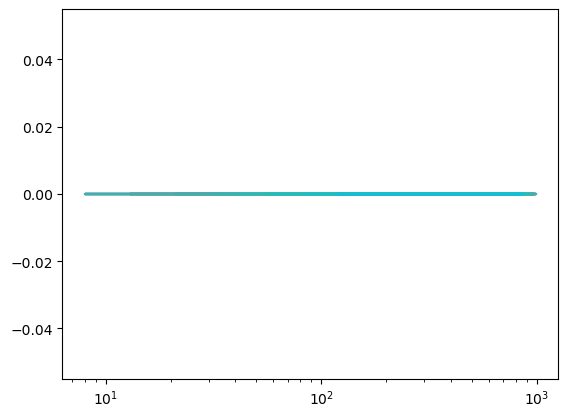

In [612]:
# Coefficient for different "alpha" values
lasso = linear_model.Lasso()
coefs = []
alphas = np.random.randint(0, 1000, 100)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(Age_features_train, Age_train)
    coefs.append(lasso.coef_)
# To observe how the coefficients vary against the alpha values randomly selected with display beneath.
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

In [613]:
# There's no dynamic it appears.

In [614]:
# Now, to make the prediction under conventional circumstances sans specifiying parameters. Observing 10 model predictions based on the training set.
Age_lasso_model.predict(Age_features_train)[:5]

array([0.86974209, 0.86974209, 0.86974209, 0.86974209, 0.86974209])

In [615]:
# Now, counterpart based on the test set

In [616]:
# Now, counterpart based on the test set.
Age_lasso_model.predict(Age_features_test)[:5]

array([0.86974209, 0.86974209, 0.86974209, 0.86974209, 0.86974209])

In [617]:
# Pursuing RMSE
y_pred = Age_lasso_model.predict(Age_features_test)
np.sqrt(mean_squared_error(Age_test, y_pred))

0.788984221767628

In [618]:
# Now the R-square score
r2_score(Age_test, y_pred)

-0.0004830274585991834

In [619]:
# Hence, independent variables in the Lasso model explain a insignificant percentage of the change in the explanatory variables. 

In [620]:
# Now, Model Tuning.
from sklearn.linear_model import RidgeCV, LassoCV
lasso_cv_model = LassoCV(alphas = np.random.randint(0, 1000, 100), cv = 5, max_iter = 10000).fit(Age_features_train, Age_train)
lasso_cv_model.alpha_

997

In [621]:
# Now, to develop the corrected Lasso Model with the optimal alpha value above.
# The exhibit the predicted values over the test set to y_pred. Of consequence, acquiring an RMSE value.
lasso_tuned = Age_lasso_model.set_params(alpha = lasso_cv_model.alpha_).fit(Age_features_train, Age_train)
y_pred_tuned = lasso_tuned.predict(Age_features_test)
np.sqrt(mean_squared_error(Age_test, y_pred_tuned))

0.788984221767628

In [622]:
# Coefficients that aren't used in Lasso regression are set to zero.
pd.Series(lasso_tuned.coef_, index = Age_features_train.columns)

0   -0.0
1   -0.0
2   -0.0
3   -0.0
4   -0.0
5   -0.0
6   -0.0
7   -0.0
8   -0.0
9   -0.0
dtype: float64

In [623]:
#So, there's verification that Age as a Target concerning galaxy properties is inconsequential. 
# There's no need for pursuit of OLS type regression models.

### Pursuing Lasso Regression Analysis for DUST ATTENUATION

In [624]:
Dust_features_train, Dust_features_test, Dust_train, Dust_test = train_test_split(Dust_features, Dust_attenuation_value, test_size = 0.3, random_state = 30)
Dust_lasso_model = linear_model.Lasso().fit(Dust_features_train, Dust_train)

In [625]:
Dust_lasso_model.coef_

array([0.      , 0.011093, 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      ])

In [626]:
Dust_lasso_model.intercept_

0.19090565416483285

In [627]:
# Prematurely it appears that the galaxy property Dust is also inconsequential based on the observed coefficients. 

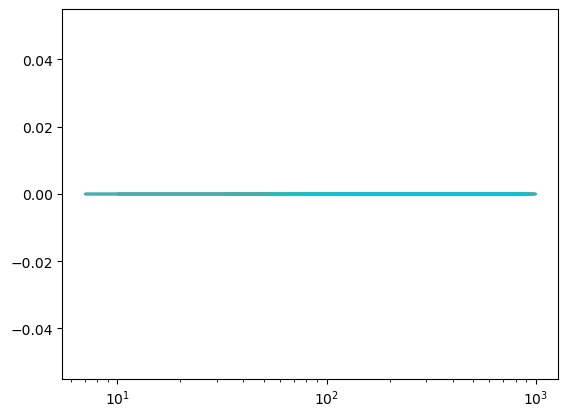

In [628]:
# Coefficient for different "alpha" values
lasso = linear_model.Lasso()
coefs = []
alphas = np.random.randint(0.0001, 1000, 100)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(Dust_features_train, Dust_train)
    coefs.append(lasso.coef_)
# To observe how the coefficients vary against the alpha values randomly selected with display beneath.
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

In [629]:
# There's no dynamic it appears.

In [630]:
# Now, to make the prediction under conventional circumstances sans specifiying parameters. Observing 10 model predictions based on the training set.
Dust_lasso_model.predict(Dust_features_train)[:5]

array([0.19118172, 0.19220487, 0.19128921, 0.19132113, 0.19108909])

In [631]:
# Now, counterpart based on the test set.
Dust_lasso_model.predict(Dust_features_test)[:5]

array([0.19868564, 0.21626957, 0.19320833, 0.19115028, 0.2145364 ])

In [632]:
# Pursuing RMSE
y_pred = Dust_lasso_model.predict(Dust_features_test)
np.sqrt(mean_squared_error(Dust_test, y_pred))

0.30228538869805904

In [633]:
# Now the R-square score
r2_score(Dust_test, y_pred)

0.15107723631259162

In [634]:
# Hence, independent variables in the Lasso model explain a insignificant percentage of the change in the explanatory variables. 

In [635]:
# Now, Model Tuning.
lasso_cv_model = LassoCV(alphas = np.random.randint(0, 1000, 100), cv = 5, max_iter = 10000).fit(Dust_features_train, Dust_train)
lasso_cv_model.alpha_

993

In [636]:
# Now, to develop the corrected Lasso Model with the optimal alpha value above.
# The exhibit the predicted values over the test set to y_pred. Of consequence, acquiring an RMSE value.
lasso_tuned = Dust_lasso_model.set_params(alpha = lasso_cv_model.alpha_).fit(Dust_features_train, Dust_train)
y_pred_tuned = lasso_tuned.predict(Dust_features_test)
np.sqrt(mean_squared_error(Dust_test, y_pred_tuned))

0.3282485503249943

In [637]:
# Coefficients that aren't used in Lasso regression are set to zero.
pd.Series(lasso_tuned.coef_, index = Dust_features_train.columns)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
dtype: float64

In [638]:
#So, there's verification that Dust as a Target concerning galaxy properties is inconsequential. 
# There's no need for pursuit of OLS type regression models.

### Pursuing Lasso Regression Analysis for MASS PRESENCE

In [639]:
Mass_features_train, mass_features_test, Mass_train, Mass_test = train_test_split(Mass_features, Mass_Measure, test_size = 0.3, random_state = 30)
Mass_lasso_model = linear_model.Lasso().fit(Mass_features_train, Mass_train)

In [640]:
Mass_lasso_model.coef_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [641]:
Mass_lasso_model.intercept_

8.353759732480768

In [642]:
# Prematurely it appears that the galaxy property Dust is also inconsequential based on the observed coefficients. 

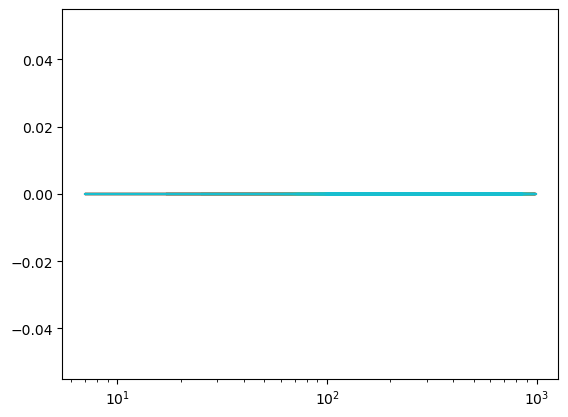

In [643]:
# Coefficient for different "alpha" values
lasso = linear_model.Lasso()
coefs = []
alphas = np.random.randint(0, 1000, 100)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(Mass_features_train, Mass_train)
    coefs.append(lasso.coef_)
# To observe how the coefficients vary against the alpha values randomly selected with display beneath.
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

In [644]:
# Apperantly, there's some interesting dynamic.

In [645]:
# Now, to make the prediction under conventional circumstances sans specifiying parameters. Observing 10 model predictions based on the training set.
Mass_lasso_model.predict(Mass_features_train)[:5]

array([8.35375973, 8.35375973, 8.35375973, 8.35375973, 8.35375973])

In [646]:
# Now, counterpart based on the test set.
Mass_lasso_model.predict(mass_features_test)[:5]

array([8.35375973, 8.35375973, 8.35375973, 8.35375973, 8.35375973])

In [647]:
# Pursuing RMSE
y_pred = Mass_lasso_model.predict(mass_features_test)
np.sqrt(mean_squared_error(Mass_test, y_pred))

0.7161889059524507

In [648]:
# Now the R-square score
r2_score(Mass_test, y_pred)

-0.0002566081527826114

In [649]:
# Now, Model Tuning.
lasso_cv_model = LassoCV(alphas = np.random.randint(0, 1000, 100), cv = 5, max_iter = 10000).fit(Mass_features_train, Mass_train)
lasso_cv_model.alpha_

996

In [650]:
# Now, to develop the corrected Lasso Model with the optimal alpha value above.
# The exhibit the predicted values over the test set to y_pred. Of consequence, acquiring an RMSE value.
lasso_tuned = Mass_lasso_model.set_params(alpha = lasso_cv_model.alpha_).fit(Mass_features_train, Mass_train)
y_pred_tuned = lasso_tuned.predict(mass_features_test)
np.sqrt(mean_squared_error(Mass_test, y_pred_tuned))

0.7161889059524507

In [651]:
# Coefficients that aren't used in Lasso regression are set to zero.
pd.Series(lasso_tuned.coef_, index = Mass_features_train.columns)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
dtype: float64

### Pursuing Lasso Regression Analysis for TAU

In [652]:
Tau_features_train, Tau_features_test, Tau_train, Tau_test = train_test_split(Tau_features, Star_formation_history, test_size = 0.3, random_state = 30)
Tau_lasso_model = linear_model.Lasso().fit(Tau_features_train, Tau_train)

In [653]:
Tau_lasso_model.coef_

array([ 0., -0., -0., -0., -0., -0., -0., -0., -0., -0.])

In [654]:
Tau_lasso_model.intercept_

0.6757190959793202

In [655]:
# Prematurely it appears that the galaxy property Dust is also inconsequential based on the observed coefficients. 

C:\Users\verlene\AppData\Local\Temp\ipykernel_13360\2809755039.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\verlene\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
C:\Users\verlene\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.580e+02, tolerance: 1.521e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.


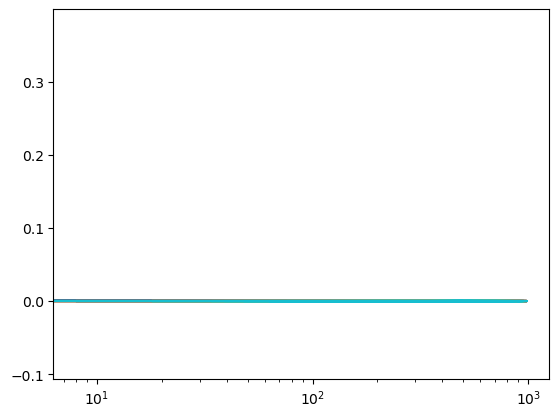

In [656]:
# Coefficient for different "alpha" values
lasso = linear_model.Lasso()
coefs = []
alphas = np.random.randint(0, 1000, 100)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(Tau_features_train, Tau_train)
    coefs.append(lasso.coef_)
# To observe how the coefficients vary against the alpha values randomly selected with display beneath.
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

In [657]:
# Apparently, there's no dynamic.

In [658]:
# Now, to make the prediction under conventional circumstances sans specifiying parameters. Observing 10 model predictions based on the training set.
Tau_lasso_model.predict(Tau_features_train)[:5]

array([0.6757191, 0.6757191, 0.6757191, 0.6757191, 0.6757191])

In [659]:
# Now, to make the prediction under conventional circumstances sans specifiying parameters. Observing 10 model predictions based on the training set.
Tau_lasso_model.predict(Tau_features_train)[:5]

array([0.6757191, 0.6757191, 0.6757191, 0.6757191, 0.6757191])

In [660]:
# Now, counterpart based on the test set.
Tau_lasso_model.predict(Tau_features_test)[:5]

array([0.6757191, 0.6757191, 0.6757191, 0.6757191, 0.6757191])

In [661]:
# Pursuing RMSE
y_pred = Tau_lasso_model.predict(Tau_features_test)
np.sqrt(mean_squared_error(Tau_test, y_pred))

1.318149199429032

In [662]:
# Now the R-square score
r2_score(Tau_test, y_pred)

-0.0018033514586528465

In [663]:
# Now, Model Tuning.
lasso_cv_model = LassoCV(alphas = np.random.randint(0, 1000, 100), cv = 5, max_iter = 10000).fit(Tau_features_train, Tau_train)
lasso_cv_model.alpha_

997

In [664]:
# Now, to develop the corrected Lasso Model with the optimal alpha value above.
# The exhibit the predicted values over the test set to y_pred. Of consequence, acquiring an RMSE value.
lasso_tuned = Tau_lasso_model.set_params(alpha = lasso_cv_model.alpha_).fit(Tau_features_train, Tau_train)
y_pred_tuned = lasso_tuned.predict(Tau_features_test)
np.sqrt(mean_squared_error(Tau_test, y_pred_tuned))

1.318149199429032

In [665]:
# Coefficients that aren't used in Lasso regression are set to zero.
pd.Series(lasso_tuned.coef_, index = Tau_features_train.columns)

0    0.0
1   -0.0
2   -0.0
3   -0.0
4   -0.0
5   -0.0
6   -0.0
7   -0.0
8   -0.0
9   -0.0
dtype: float64

### Pursuing Principal Component Analysis

In [666]:
# Will pursue PCA regardless of earlier results for selected features w.r.t. targets - 
       # To acquire visual interpretatation of their relevance w.r.t. to mean squared error (MSE).
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler() # For centering data
spectra_data = scaler.fit_transform(spectra) # Standardizing
spectra_data

array([[-0.47516316, -0.47360379, -0.47469353, ..., -0.21246022,
        -0.21132459, -0.21091351],
       [-0.46675332, -0.46617448, -0.46611587, ..., -0.2038459 ,
        -0.20293205, -0.20256309],
       [-0.50969676, -0.50946503, -0.50894561, ..., -0.21586594,
        -0.21474328, -0.21429193],
       ...,
       [ 0.24524872,  0.24106222,  0.24005608, ..., -0.19142524,
        -0.19075156, -0.19070677],
       [-0.40172644, -0.40143846, -0.40117454, ..., -0.19988653,
        -0.19894146, -0.19856942],
       [-0.29395337, -0.29401388, -0.29259307, ..., -0.16924447,
        -0.16805465, -0.16754173]])

In [667]:
spectra_data.shape

(1000, 850)

In [668]:
# Checking whether the normalized data has a mean of zero and standard deviation of one. 
np.mean(spectra_data), np.std(spectra_data)

(-6.833749252751552e-19, 0.9999999999999999)

In [669]:
# The first number is a very small value near naught, where limits in floating-point arithmetic can occur. 
# The second number above pretty much can be identified as unit.  

In [670]:
# Building the PCA
pca = PCA(n_components = 10)
spectra_pca = pca.fit_transform(spectra_data)
# Creating a dataframe having the principal components for the samples
principal_Df = pd.DataFrame(spectra_pca, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])
principal_Df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-9.235548,3.583578,-0.003930,-0.582439,-0.052230,-0.146087,0.015138,-0.038655,-0.046264,-0.005933
1,-8.778937,3.640832,0.187926,-0.592938,0.029069,-0.094392,0.023904,-0.003099,-0.018497,-0.009369
2,-9.997276,4.255414,-0.124010,-0.486980,-0.145628,-0.036670,-0.007107,-0.008986,0.014949,-0.019792
3,-7.048729,1.289435,-0.157064,0.063908,0.067264,-0.026987,-0.017008,-0.002379,0.004876,0.008921
4,-4.488607,-2.217092,-0.760444,0.996096,0.058000,0.070439,-0.071429,0.013604,0.037076,0.027917
...,...,...,...,...,...,...,...,...,...,...
995,-3.133610,-0.003100,0.265363,-0.189220,-0.003221,0.000347,0.048161,0.019427,0.012585,-0.045097
996,-8.509147,3.295079,-0.288528,-0.801971,-0.257505,0.106981,0.018782,0.002144,0.025840,-0.027601
997,-4.109728,-2.658247,-0.824617,1.135015,0.060821,0.099820,-0.081134,0.020708,0.051748,0.028725
998,-8.304283,2.984836,0.032859,-0.461545,-0.022242,-0.068031,0.016673,-0.002604,-0.004368,-0.014923


In [671]:
principal_Df.shape

(1000, 10)

In [672]:
# Returning an array of the percentage of varianced explained by each principal component in descending order.
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [7.36351734e-01 2.36963566e-01 1.81068495e-02 7.44637458e-03
 4.47609850e-04 4.23044432e-04 1.38751202e-04 4.80085776e-05
 3.30411573e-05 1.78173638e-05]


In [673]:
# It appears that principal component 1 holds approximately 74%; principal component 2 holds approximately 24% of the information. 
# Virtually no information was lost

### Principal Component Analysis with Features and Targets

Text(0.5, 1.0, 'Mass Presence')

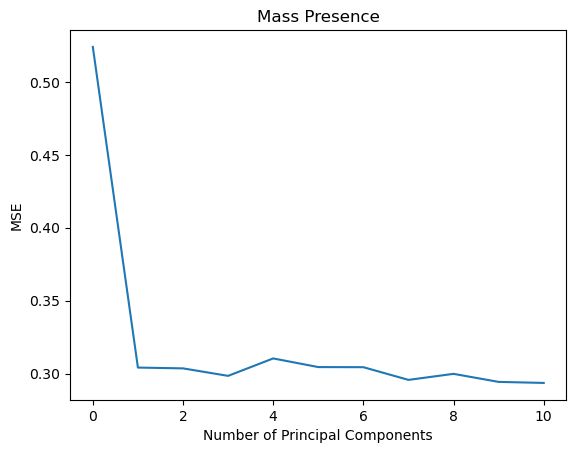

In [674]:
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pca = PCA()
# Scaling predictor variables
Spectra_x = pca.fit_transform(scale(spectra))
# Identifying cross validation method
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
regr = LinearRegression()
mse = []


# Calculating MSE. Mass-Target treatment

score = -1*model_selection.cross_val_score(regr, np.ones((len(Spectra_x), 1)), Mass_Measure, cv = cv, scoring = 'neg_mean_squared_error').mean()
mse.append(score)

for i in np.arange(1, 11):
    score = -1*model_selection.cross_val_score(regr, Spectra_x[:,:i], Mass_Measure, cv = cv, scoring = 'neg_mean_squared_error').mean()
    mse.append(score)
# Plot cross validation results
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Mass Presence')

In [675]:
# From the above figure there's good performance between 1 to 3 PCs.

Text(0.5, 1.0, 'Age')

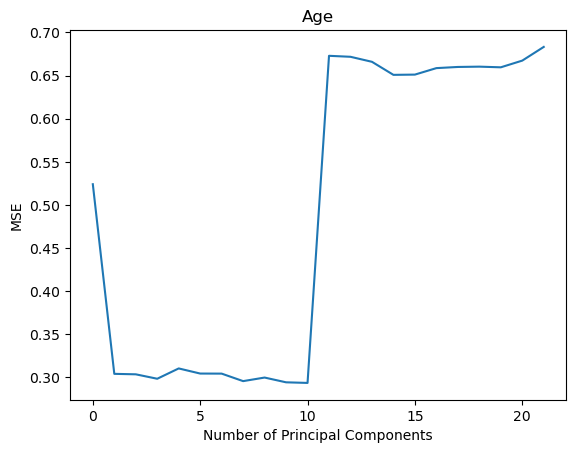

In [676]:
# Calculating MSE. Age-Target treatment

score = -1*model_selection.cross_val_score(regr, np.ones((len(Spectra_x), 1)), Age, cv = cv, scoring = 'neg_mean_squared_error').mean()
mse.append(score)

for i in np.arange(1, 11):
    score = -1*model_selection.cross_val_score(regr, Spectra_x[:,:i], Age, cv = cv, scoring = 'neg_mean_squared_error').mean()
    mse.append(score)
# Plot cross validation results
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Age')

In [677]:
# From the above figure, 1 to 3 PCs provide good performance.

Text(0.5, 1.0, 'Dust')

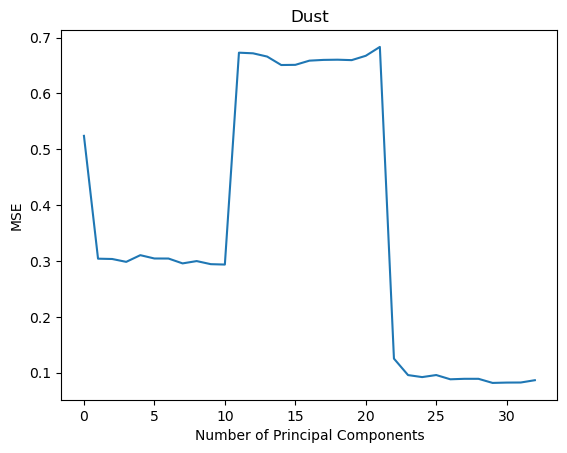

In [678]:

# Calculating MSE via cross validation, adding one component at a time. Dust-Target treatment

score = -1*model_selection.cross_val_score(regr, np.ones((len(Spectra_x), 1)), Dust_attenuation_value, cv = cv, scoring = 'neg_mean_squared_error').mean()
mse.append(score)

for i in np.arange(1, 11):
    score = -1*model_selection.cross_val_score(regr, Spectra_x[:,:i], Dust_attenuation_value, cv = cv, scoring = 'neg_mean_squared_error').mean()
    mse.append(score)
# Plot cross validation results
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Dust')

In [679]:
# From above figure there's good performance for 1 to 3 PCs.

Text(0.5, 1.0, 'Tau')

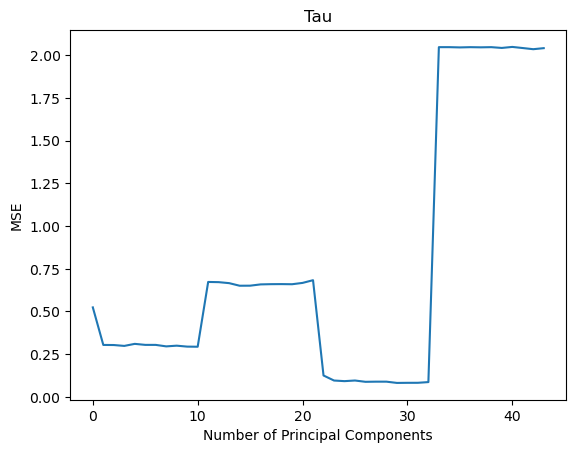

In [680]:

# Calculating MSE via cross validation, adding one component at a time. Tau-Target treatment

score = -1*model_selection.cross_val_score(regr, np.ones((len(Spectra_x), 1)), Star_formation_history, cv = cv, scoring = 'neg_mean_squared_error').mean()
mse.append(score)

for i in np.arange(1, 11):
    score = -1*model_selection.cross_val_score(regr, Spectra_x[:,:i], Star_formation_history, cv = cv, scoring = 'neg_mean_squared_error').mean()
    mse.append(score)
# Plot cross validation results
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Tau')

In [681]:
# For above figure, there's good performance for 1 to 3 PCs.

### Multilinear OLS Concerning the AGE Target just for record

In [682]:
Age_features_train, Age_features_test, Age_train, Age_test = train_test_split(Age_features, Age, test_size = 0.3, random_state = 30)
Age_lasso_model = linear_model.Lasso().fit(Age_features_train, Age_train)

In [683]:
Age_mlr = LinearRegression()
Age_mlr.fit(Age_features_train, Age_train)
print("Intercept: ", Age_mlr.intercept_)
print("Coefficients: ", Age_mlr.coef_)

Intercept:  0.9174135830809548
Coefficients:  [ 291.37583327 -495.44867985  369.00406327 -485.96940633 -345.71595708
   67.17002554 1091.05683426 -558.03087352    2.47166582   67.56511021]


In [684]:
# Generating Summary Statistics concerning any existing relationship between Age target and Age features.
import statsmodels.api as smf
Age_model = smf.OLS(Age_train, Age_features_train).fit()
Age_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Age (Gyr)   R-squared (uncentered):                   0.176
Model:                            OLS   Adj. R-squared (uncentered):              0.164
Method:                 Least Squares   F-statistic:                              14.78
Date:                Wed, 17 May 2023   Prob (F-statistic):                    5.15e-24
Time:                        15:41:12   Log-Likelihood:                         -1055.2
No. Observations:                 700   AIC:                                      2130.
Df Residuals:                     690   BIC:                                      2176.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0            835.6756    148.656      5.622      0.000     543.803    1127.549
1            353.1589    277.949      1.271      0.204    -192.568     898.886
2           -963.5205    312.194     -3.086      0.002   -1576.484    -350.557
3           -679.1359    212.310     -3.199      0.001   -1095.987    -262.285
4            -36.5181    151.506     -0.241      0.810    -333.987     260.951
5            246.2383     57.176      4.307      0.000     133.979     358.498
6            278.2128    477.590      0.583      0.560    -659.490    1215.916
7            -24.4183    266.768     -0.092      0.927    -548.194     499.357
8             38.7980     13.757      2.820      0.005      11.787      65.809
9            -46.0857     48.556     -0.949      0.343    -141.421      49.250
==============================================================================
Omnibus:                      266.129   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1167.756
Skew:                           1.711   Prob(JB):                    2.66e-254
Kurtosis:                       8.323   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [685]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score = cross_val_score(Age_mlr, Age_features, Age, cv = 5)
cross_val_predict = cross_val_predict(Age_mlr, Age_features, Age, cv = 5)

In [686]:
cross_val_score

array([ 0.15691418,  0.05796661, -0.09691953,  0.04913212, -0.00486833])

In [687]:
# RMSE
np.sqrt(mean_squared_error(Age, cross_val_predict))

0.8058105713895684

### Multilinear OLS Concerning the DUST Target for just record

In [688]:
Dust_features_train, Dust_features_test, Dust_train, Dust_test = train_test_split(Dust_features, Dust_attenuation_value, test_size = 0.3, random_state = 30)
Dust_lasso_model = linear_model.Lasso().fit(Dust_features_train, Dust_train)

In [689]:
Dust_mlr = LinearRegression()
Dust_mlr.fit(Dust_features_train, Dust_train)
print("Intercept: ", Dust_mlr.intercept_)
print("Coefficients: ", Dust_mlr.coef_)

Intercept:  0.15074549256589004
Coefficients:  [ 1.07916788e+01 -3.79586398e+01  3.64954677e+01 -1.82445760e-01
 -7.83115451e+02  1.78875621e+02 -1.26194668e+02  1.48739535e+03
 -8.32786138e+02  6.97410710e+01]


In [690]:
# Generating Summary Statistics concerning any existing relationship between Dust target and Dust features.
import statsmodels.api as smf
Dust_model = smf.OLS(Dust_train, Dust_features_train).fit()
Dust_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Dust attenuation value   R-squared (uncentered):                   0.511
Model:                                OLS   Adj. R-squared (uncentered):              0.504
Method:                     Least Squares   F-statistic:                              72.04
Date:                    Wed, 17 May 2023   Prob (F-statistic):                   3.14e-100
Time:                            15:41:12   Log-Likelihood:                         -134.75
No. Observations:                     700   AIC:                                      289.5
Df Residuals:                         690   BIC:                                      335.0
Df Model:                              10                                                  
Covariance Type:                nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             17.4440      7.990      2.183      0.029       1.755      33.133
1            -62.3035     20.473     -3.043      0.002    -102.499     -22.108
2             61.1992     22.787      2.686      0.007      16.460     105.939
3             -0.1350      0.143     -0.944      0.346      -0.416       0.146
4           -605.5406    356.172     -1.700      0.090   -1304.852      93.771
5            218.9854    232.097      0.944      0.346    -236.715     674.686
6           -886.4814    522.904     -1.695      0.090   -1913.155     140.193
7           2303.6203    728.566      3.162      0.002     873.149    3734.092
8          -1747.8428    747.058     -2.340      0.020   -3214.622    -281.064
9            703.3328    502.045      1.401      0.162    -282.386    1689.052
==============================================================================
Omnibus:                      364.889   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2788.171
Skew:                           2.231   Prob(JB):                         0.00
Kurtosis:                      11.700   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [691]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score = cross_val_score(Dust_mlr, Dust_features, Dust_attenuation_value, cv = 5)
cross_val_predict = cross_val_predict(Dust_mlr, Dust_features, Dust_attenuation_value, cv = 5)

In [692]:
# RMSE
np.sqrt(mean_squared_error(Dust_attenuation_value, cross_val_predict))

0.43503289924771266

### Multilinear OLS Concerning the MASS PRESENCE Target just for record

In [693]:
Mass_mlr = LinearRegression()
Mass_mlr.fit(Mass_features_train, Mass_train)
print("Intercept: ", Mass_mlr.intercept_)
print("Coefficients: ", Mass_mlr.coef_)

Intercept:  8.012455304106695
Coefficients:  [-304.3836222   398.75687344  225.06137332 -176.34496323  129.86418571
 -540.68632734 -377.28876303  106.22867518  642.22948422  -99.58995906]


In [694]:
# Generating Summary Statistics concerning any existing relationship between Mass Presence target and Mass features.
Mass_model = smf.OLS(Mass_train, Mass_features_train).fit()
Mass_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Log10(Mass/Mass_Sun)   R-squared (uncentered):                   0.374
Model:                              OLS   Adj. R-squared (uncentered):              0.365
Method:                   Least Squares   F-statistic:                              41.31
Date:                  Wed, 17 May 2023   Prob (F-statistic):                    6.09e-64
Time:                          15:41:13   Log-Likelihood:                         -2317.6
No. Observations:                   700   AIC:                                      4655.
Df Residuals:                       690   BIC:                                      4701.
Df Model:                            10                                                  
Covariance Type:              nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           -671.5362    617.980     -1.087      0.278   -1884.883     541.811
1           3758.2039    539.364      6.968      0.000    2699.213    4817.195
2           2492.9771    473.492      5.265      0.000    1563.318    3422.636
3          -3058.3593    624.799     -4.895      0.000   -4285.094   -1831.624
4          -1408.8599    796.923     -1.768      0.078   -2973.545     155.825
5          -5524.6661    896.094     -6.165      0.000   -7284.064   -3765.268
6          -4400.1627   1066.450     -4.126      0.000   -6494.040   -2306.286
7           2840.5050    523.637      5.425      0.000    1812.392    3868.618
8           6893.9450   1552.369      4.441      0.000    3846.012    9941.878
9           -857.4018    873.538     -0.982      0.327   -2572.513     857.710
==============================================================================
Omnibus:                      427.458   Durbin-Watson:                   0.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3311.459
Skew:                          -2.750   Prob(JB):                         0.00
Kurtosis:                      12.127   Cond. No.                     3.39e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [695]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score = cross_val_score(Mass_mlr, Mass_features, Mass_Measure, cv = 5)
cross_val_predict = cross_val_predict(Mass_mlr, Mass_features, Mass_Measure, cv = 5)

In [696]:
# RMSE
np.sqrt(mean_squared_error(Mass_Measure, cross_val_predict))

0.5372612181129087

### Multilinear OLS Concerning the TAU Target just for record

In [697]:
Tau_mlr = LinearRegression()
Tau_mlr.fit(Tau_features_train, Tau_train)
print("Intercept: ", Tau_mlr.intercept_)
print("Coefficients: ", Tau_mlr.coef_)

Intercept:  0.6820144335959692
Coefficients:  [ 6.89986389e-01  4.27908358e+01 -2.23505028e+02  1.54902802e+02
  5.71817247e+01  4.75650904e+01  9.54134343e+01  1.95964184e+02
 -8.26723890e+02  4.56953778e+02]


In [698]:
# Generating Summary Statistics concerning any existing relationship between Tau target and Tau features.
import statsmodels.api as smf
Tau_model = smf.OLS(Tau_train, Tau_features_train).fit()
Tau_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Tau (Gyr)   R-squared (uncentered):                   0.048
Model:                            OLS   Adj. R-squared (uncentered):              0.034
Method:                 Least Squares   F-statistic:                              3.465
Date:                Wed, 17 May 2023   Prob (F-statistic):                    0.000184
Time:                        15:41:13   Log-Likelihood:                         -1314.6
No. Observations:                 700   AIC:                                      2649.
Df Residuals:                     690   BIC:                                      2695.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              2.5847      1.058      2.444      0.015       0.508       4.661
1           -123.1154    184.324     -0.668      0.504    -485.018     238.787
2           -121.8956   1126.396     -0.108      0.914   -2333.471    2089.680
3            367.5258   1187.192      0.310      0.757   -1963.417    2698.469
4            -52.7011    409.934     -0.129      0.898    -857.570     752.168
5             39.8076    134.890      0.295      0.768    -225.036     304.651
6            199.9696    254.098      0.787      0.432    -298.929     698.868
7            998.1318    998.577      1.000      0.318    -962.482    2958.746
8          -2738.5914   2685.356     -1.020      0.308   -8011.041    2533.859
9           1432.6013   1423.645      1.006      0.315   -1362.594    4227.797
==============================================================================
Omnibus:                      607.859   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11328.079
Skew:                           4.034   Prob(JB):                         0.00
Kurtosis:                      20.980   Cond. No.                     6.78e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [699]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score = cross_val_score(Tau_mlr, Tau_features, Star_formation_history, cv = 5)
cross_val_predict = cross_val_predict(Tau_mlr, Tau_features, Star_formation_history, cv = 5)

In [700]:
# RMSE
np.sqrt(mean_squared_error(Star_formation_history, cross_val_predict))

1.4616322525395034

### Application of Random Forest for AGE Target

In [701]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [702]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Tree Visualization
from sklearn.tree import export_graphviz
from IPython.display import Image 
import graphviz
from sklearn import preprocessing 
from sklearn import utils

In [728]:
# Random forest for Age target w.r.t. features selection 
lab = preprocessing.LabelEncoder()
Age_transformed = lab.fit_transform(Age)
Age_train_transformed = lab.fit_transform(Age_train)
Age_test_transformed = lab.fit_transform(Age_test)
Age_rf = RandomForestClassifier()
Age_rf_model = Age_rf.fit(Age_features_train, Age_train_transformed)
Age_pred = Age_rf.predict(Age_features_test)
accuracy = accuracy_score(Age_test_transformed, Age_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [732]:
# Hyperparameter Tuning
from sklearn.model_selection import KFold
param_dist = {'n_estimators': randint(50, 500), 'max_depth': randint(1, 20)}
# Using a random search to obtain the best hyperparameters
rand_search = RandomizedSearchCV(Age_rf, param_distributions = param_dist, n_iter = 5, cv = KFold(n_splits = 5))
# Fitting the random search object to data 
rand_search.fit(Age_features_train, Age_train_transformed)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000209A7068C70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000209A71A4850>})

In [733]:
# Creating a variable for the best model
best_rf = rand_search.best_estimator_
# Print best hyperparameters
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 442}


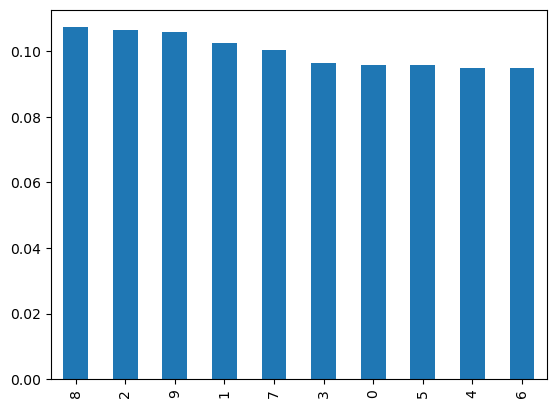

In [734]:
# Creating a Series containing feature importances from the model and "feature names" from the trainimg data.
feature_importances = pd.Series(best_rf.feature_importances_, index = Age_features_train.columns).sort_values(ascending = False)
#Plotting a bard chart 
feature_importances.plot.bar();

In [719]:
# Results above show characteristics simliar to a (almost) discrete uniform distribution.
# Conveying that any one feature can be substituted for another. 

### Random Forest Regressor for AGE

In [738]:
from sklearn import tree
import dtreeviz
from sklearn.ensemble import RandomForestRegressor
Age_rfr = RandomForestRegressor(n_estimators = 10)
Age_rfr_model = Age_rfr.fit(Age_features_train, Age_train_transformed)
Age_rfr_model.score(Age_features_train, Age_train_transformed)

0.8130107848033509

In [755]:
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(Age_rfr_model, Age_features, Age_transformed, cv = 5)

array([-0.06303391, -0.12906488, -0.14603561, -0.2252631 , -0.17759307])

In [756]:
cross_val_predict = cross_val_predict(Age_rfr_model, Age_features, Age_transformed, cv = 5)

In [757]:
# RMSE
np.sqrt(mean_squared_error(Age_transformed, cross_val_predict))

308.19660173337405

### KNN Regressor for AGE

In [758]:
from sklearn.neighbors import KNeighborsRegressor
Age_KN_regress = KNeighborsRegressor(n_neighbors = 3)
Age_KN_regress_model = Age_KN_regress.fit(Age_features_train, Age_train_transformed)

In [759]:
Age_KN_regress_model.score(Age_features_train, Age_train_transformed)

0.4514983014056686

In [760]:
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(Age_KN_regress_model, Age_features, Age_transformed, cv = 5)

array([-0.08755184, -0.07639252, -0.18055683, -0.25398118, -0.17608652])

In [761]:
cross_val_predict = cross_val_predict(Age_KN_regress_model, Age_features, Age_transformed, cv = 5)

In [762]:
# RMSE
np.sqrt(mean_squared_error(Age_transformed, cross_val_predict))

309.7377381664114

### Application of Random Forest for MASS Target

In [763]:
# Random forest for Age target w.r.t. features selection 
lab = preprocessing.LabelEncoder()
Mass_Measure_transformed = lab.fit_transform(Mass_Measure)
Mass_train_transformed = lab.fit_transform(Mass_train)
Mass_test_transformed = lab.fit_transform(Mass_test)
Mass_rf = RandomForestClassifier()
Mass_rf.fit(Mass_features_train, Mass_train_transformed)
Mass_pred = Mass_rf.predict(mass_features_test)
accuracy = accuracy_score(Mass_test_transformed, Mass_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [764]:
# Hyperparameter Tuning
from sklearn.model_selection import KFold
param_dist = {'n_estimators': randint(50, 500), 'max_depth': randint(1, 20)}
# Using a random search to find the best hyperparameters
rand_search = RandomizedSearchCV(Mass_rf, param_distributions = param_dist, n_iter = 5, cv = KFold(n_splits = 5))
# Fitting the random search object to the data
rand_search.fit(Mass_features_train, Mass_train_transformed) 

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020A63F3C1F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000209A8048070>})

In [765]:
# Creating a variable for the best model
best_rf = rand_search.best_estimator_
# Print best hyperparameters
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 12, 'n_estimators': 144}


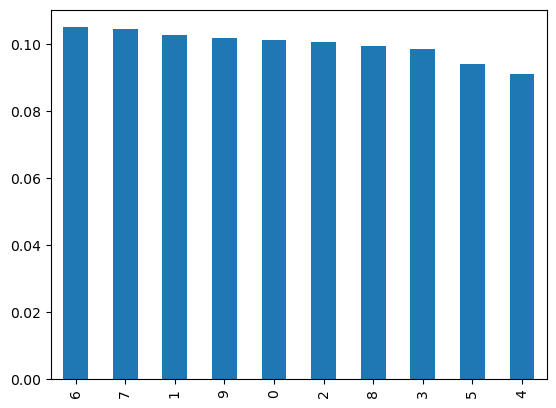

In [767]:
# Creating a Series containing feature importances from the model and "feature names" from the trainimg data.
feature_importances = pd.Series(best_rf.feature_importances_, index = Mass_features_train.columns).sort_values(ascending = False)
#Plotting a bard chart 
feature_importances.plot.bar();

In [830]:
# Results above show characteristics simliar to a (almost) discrete uniform distribution.
# Conveying that any one feature can be substituted for another. 

### Random Forest Regressor for MASS

In [795]:
Mass_rfr = RandomForestRegressor(n_estimators = 10)
Mass_rfr_model = Mass_rfr.fit(Mass_features_train, Mass_train_transformed)
Mass_rfr_model.score(Mass_features_train, Mass_train_transformed)

0.9730424501740965

In [796]:
cross_val_score(Mass_rfr_model, Mass_features, Mass_Measure_transformed, cv = 5)

array([0.85859549, 0.83820774, 0.86377556, 0.84335643, 0.85067532])

### KNN Regressor for MASS

In [808]:
from sklearn.neighbors import KNeighborsRegressor
Mass_KN_regress = KNeighborsRegressor(n_neighbors = 3)
Mass_KN_regress_model = Mass_KN_regress.fit(Mass_features_train, Mass_train_transformed)

In [809]:
Mass_KN_regress_model.score(Mass_features_train, Mass_train_transformed)

0.9372302897799889

In [820]:
# Above results conveys a strong model.

### Application of Random Forest for DUST Target

In [821]:
# Random forest for Age target w.r.t. features selection 
lab = preprocessing.LabelEncoder()
Dust_attenuation_value_transformed = lab.fit_transform(Dust_attenuation_value)
Dust_train_transformed = lab.fit_transform(Dust_train)
Dust_test_transformed = lab.fit_transform(Dust_test)
Dust_rf = RandomForestClassifier()
Dust_rf.fit(Dust_features_train, Dust_train_transformed)
Dust_pred = Dust_rf.predict(Dust_features_test)
accuracy = accuracy_score(Dust_test_transformed, Dust_pred)
print("Accuracy:", accuracy)

Accuracy: 0.006666666666666667


In [822]:
# Hyperparameter Tuning
from sklearn.model_selection import KFold
param_dist = {'n_estimators': randint(50, 500), 'max_depth': randint(1, 20)}
# Using a random search to find the best hyperparameters
rand_search = RandomizedSearchCV(Dust_rf, param_distributions = param_dist, n_iter = 5, cv = KFold(n_splits = 5))
# Fitting the random search object to the data
rand_search.fit(Dust_features_train, Dust_train_transformed) 

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020A54149160>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000209A806AD00>})

In [823]:
# Creating a variable for the best model
best_rf = rand_search.best_estimator_
# Print best hyperparameters
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'n_estimators': 393}


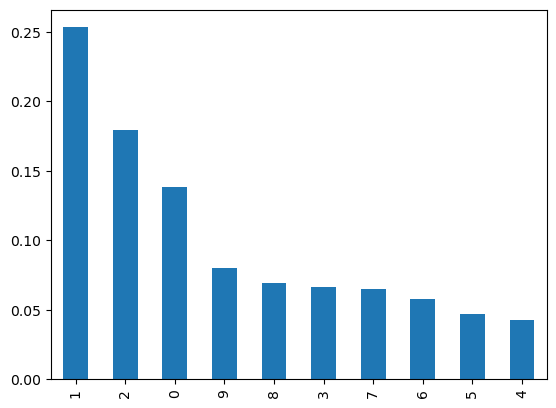

In [824]:
# Creating a Series containing feature importances from the model and "feature names" from the trainimg data.
feature_importances = pd.Series(best_rf.feature_importances_, index = Dust_features_train.columns).sort_values(ascending = False)
#Plotting a bard chart 
feature_importances.plot.bar();

In [825]:
# Distribution like behavior may be exponential or gamma related, or even beta related. 

### Random Forest Regressor for Dust

In [826]:
Dust_rfr = RandomForestRegressor(n_estimators = 10)
Dust_rfr_model = Dust_rfr.fit(Dust_features_train, Dust_train_transformed)
Dust_rfr_model.score(Dust_features_train, Dust_train_transformed)

0.9481993796937944

In [828]:
cross_val_score(Dust_rfr_model, Dust_features, Dust_attenuation_value_transformed, cv = 5)

array([0.79206272, 0.74365142, 0.72906529, 0.75961081, 0.78705512])

### KNN Regressor for DUST

In [832]:
from sklearn.neighbors import KNeighborsRegressor
Dust_KN_regress = KNeighborsRegressor(n_neighbors = 3)
Dust_KN_regress_model = Dust_KN_regress.fit(Dust_features_train, Dust_train_transformed)

In [834]:
Dust_KN_regress_model.score(Dust_features_train, Dust_train_transformed)

0.8298091497533013

### Application of Random Forest for TAU Target

In [837]:
# Random forest for Age target w.r.t. features selection 
lab = preprocessing.LabelEncoder()
Star_formation_history_transformed = lab.fit_transform(Star_formation_history)
Tau_train_transformed = lab.fit_transform(Tau_train)
Tau_test_transformed = lab.fit_transform(Tau_test)
Tau_rf = RandomForestClassifier()
Tau_rf.fit(Tau_features_train, Tau_train_transformed)
Tau_pred = Tau_rf.predict(Tau_features_test)
accuracy = accuracy_score(Tau_test_transformed, Tau_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [838]:
# Hyperparameter Tuning
from sklearn.model_selection import KFold
param_dist = {'n_estimators': randint(50, 500), 'max_depth': randint(1, 20)}
# Using a random search to find the best hyperparameters
rand_search = RandomizedSearchCV(Tau_rf, param_distributions = param_dist, n_iter = 5, cv = KFold(n_splits = 5))
# Fitting the random search object to the data
rand_search.fit(Tau_features_train, Tau_train_transformed) 

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000208E2427D90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000209A80DFC70>})

In [839]:
# Creating a variable for the best model
best_rf = rand_search.best_estimator_
# Print best hyperparameters
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 229}


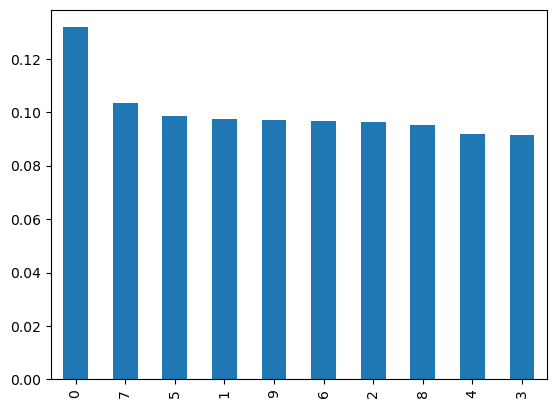

In [840]:
# Creating a Series containing feature importances from the model and "feature names" from the trainimg data.
feature_importances = pd.Series(best_rf.feature_importances_, index = Tau_features_train.columns).sort_values(ascending = False)
#Plotting a bard chart 
feature_importances.plot.bar();

### Random Forest Regressor for TAU

In [843]:
Tau_rfr = RandomForestRegressor(n_estimators = 10)
Tau_rfr_model = Tau_rfr.fit(Tau_features_train, Tau_train_transformed)
Tau_rfr_model.score(Tau_features_train, Tau_train_transformed)

0.8362789183534777

In [844]:
cross_val_score(Tau_rfr_model, Tau_features, Star_formation_history_transformed, cv = 5)

array([-0.03250312,  0.09404885,  0.08368679, -0.01936005,  0.05988208])

### KNN Regressor for TAU

In [845]:
Tau_KN_regress = KNeighborsRegressor(n_neighbors = 3)
Tau_KN_regress_model = Tau_KN_regress.fit(Tau_features_train, Tau_train_transformed)

In [846]:
Tau_KN_regress_model.score(Tau_features_train, Tau_train_transformed)

0.43038017861844036

### CONCLUSION

For analysis of the identified galaxies properties, termed targets in the language of machine learning, exploratory data analysis, supervised learning and unsurprvised learning were incorprated to pursue strong models. Lasso regression almost proved discouraging in regards to feature importance for all targets. Following, common multilinear OLS regression models were developed and tested. Following, use of principal component analysis was applied to identify the effect of the amount of features with model performance. KNN regression r-squared scores and Random Forest Regression values provided unique perspectives. Perhaps additional simulated data will provide highly conclusive results concerning KNN regression and Random forest Regression.

### REFERENCES


DataCamp.(n.d.). Learn R, Python & DataScience Online. DataCamp

Karging, K.(2021). Lasso Regression Fundamentals and Modeling in Python. Medium

kirenz, J. (2021). Lasso Regression with Python. Jan kirenz

scikit-learn.org.(n.d.). Machine Learning in Python. Scikit-Learn 

Sclove, L. S.(2022). Determning an Adquate Number of Principal Components. IntechOpen

Zach.(2020). Principal Compoents Regression in Python (Step-by-Step). Statology